In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
sns.set_theme(color_codes=True)
from sklearn import metrics
from sklearn.metrics import matthews_corrcoef 
from sklearn.metrics import precision_score, recall_score,f1_score, accuracy_score,roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from numpy import array

# Model Libraries
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn import svm
from sklearn.ensemble import ExtraTreesClassifier
from tensorflow.keras.layers import Dense, Activation, Input

In [2]:
data = pd.read_excel(r"D:\UJ-ACCENTURE\Capstone Project\complete_data.xlsx")
data.head()

,Borehole ID,Depth From (m),Depth to (m),Run Length (m),True Thickness (m),Weathering,Hardness,Geotech Domain,Jn Description,Jr Description,...,Density,Virgin Stress,UCS Mpa,UCS/Virgin stress ratio,SRF,Q Value,LNQ,RMR,ESR VALUE,Maximum unsupported span
0,SEDD71,0.00,5.65,5.65,4.51,5.0,1.0,Weathered,Intact no or few joints,rough and discontinous,...,27000.0,3.173143,50.0,15.75725,10.0,0.000000,NaN,NaN,4.0,0.000000
1,SEDD71,5.65,7.60,1.95,6.07,4.0,1.0,Weathered,one joint set,rough and undulating,...,27000.0,3.173143,50.0,15.75725,5.0,NaN,NaN,NaN,1.6,NaN
2,SEDD71,7.60,9.42,1.82,7.52,4.0,1.0,Weathered,one joint set plus random joints,rough and planar,...,27000.0,3.173143,50.0,15.75725,2.5,NaN,NaN,NaN,1.3,NaN
3,SEDD71,9.42,10.60,1.18,8.47,3.0,3.0,Weathered,two joint set,smooth and discountinous,...,27000.0,3.173143,50.0,15.75725,7.5,0.452212,-0.793604,36.85756,1.0,1.456018
4,SEDD71,10.47,11.40,0.93,9.10,4.0,1.0,Weathered,two joint set plus random joints,smooth and undulating,...,27000.0,3.173143,50.0,15.75725,5.0,0.000000,NaN,NaN,0.8,0.000000


In [3]:
data.isnull().sum()

Borehole ID                  82
Depth From (m)               82
Depth to (m)                 82
Run Length (m)               82
True Thickness (m)           82
Weathering                   82
Hardness                     82
Geotech Domain               82
Jn Description                0
Jr Description               81
Ja Description               38
Jw Description                0
ESR Conditions               79
Depth underground (m)        82
RQD m                        82
RQD %                        82
Jn                            0
Jr                           81
Ja                           44
Jw                            0
Density                      82
Virgin Stress                82
UCS Mpa                      82
UCS/Virgin stress ratio      82
SRF                          57
Q Value                      89
LNQ                         174
RMR                         174
ESR VALUE                    79
Maximum unsupported span     89
dtype: int64

In [4]:
data.columns

Index(['Borehole ID', 'Depth From (m)', 'Depth to (m)', 'Run Length (m)',
       'True Thickness (m)', 'Weathering', 'Hardness', 'Geotech Domain',
       'Jn Description', 'Jr Description', 'Ja Description', 'Jw Description',
       'ESR Conditions', 'Depth underground (m)', 'RQD m', 'RQD %', 'Jn', 'Jr',
       'Ja', 'Jw', 'Density', 'Virgin Stress', 'UCS Mpa',
       'UCS/Virgin stress ratio', 'SRF', 'Q Value', 'LNQ', 'RMR', 'ESR VALUE',
       'Maximum unsupported span'],
      dtype='object')

## 2 Data Processing

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 679 entries, 0 to 678
Data columns (total 30 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Borehole ID               597 non-null    object 
 1   Depth From (m)            597 non-null    float64
 2   Depth to (m)              597 non-null    float64
 3   Run Length (m)            597 non-null    float64
 4   True Thickness (m)        597 non-null    float64
 5   Weathering                597 non-null    float64
 6   Hardness                  597 non-null    float64
 7   Geotech Domain            597 non-null    object 
 8   Jn Description            679 non-null    object 
 9   Jr Description            598 non-null    object 
 10  Ja Description            641 non-null    object 
 11  Jw Description            679 non-null    object 
 12  ESR Conditions            600 non-null    object 
 13  Depth underground (m)     597 non-null    float64
 14  RQD m     

## 2.1 Categorical Data

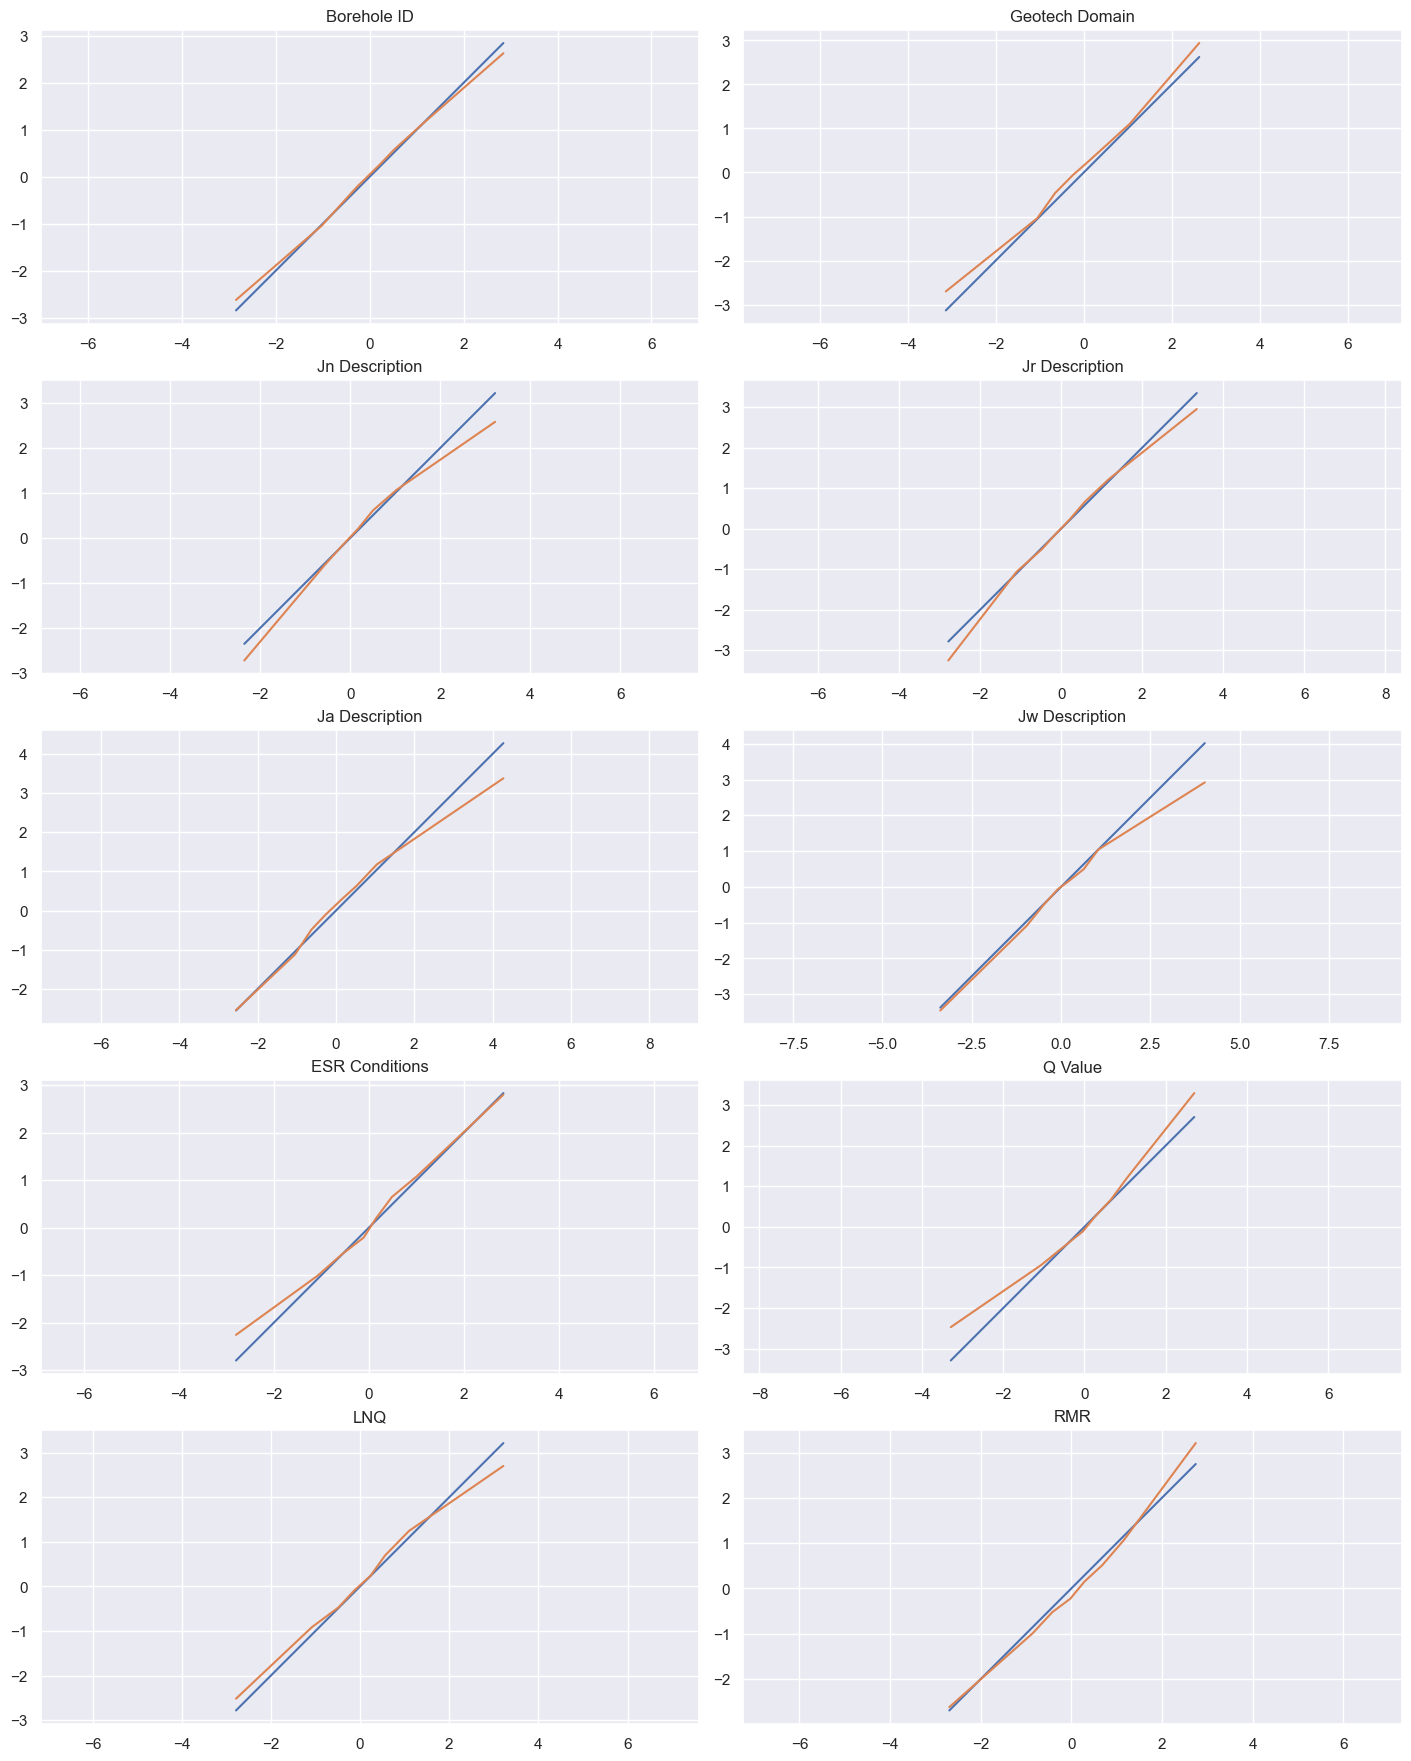

In [6]:
data = pd.DataFrame(np.random.randn(679,10), columns=['Borehole ID', 'Geotech Domain','Jn Description', 'Jr Description', 'Ja Description', 'Jw Description',
       'ESR Conditions','Q Value','LNQ','RMR'])
y=np.random.randint(0,2, (679,1))

#something to plot
data1=data[y==1].quantile(np.linspace(0,1,8))
data0=data[y==0].quantile(np.linspace(0,1,8))


from math import ceil

N=10

fig, axs = plt.subplots( ncols=2, nrows=ceil(N/2), layout='constrained',
                         figsize=(3.5 * 4, 3.5 * ceil(N/2)) )

for (i, var), ax in zip(enumerate(data.iloc[:,:N]), axs.flat):
    ax.set_title(var)
    ax.axis('equal')
    ax.plot(data0.loc[:][var], data0.loc[:][var])
    ax.plot(data0.loc[:][var], data1.loc[:][var])

## 2.2 Numerical Data

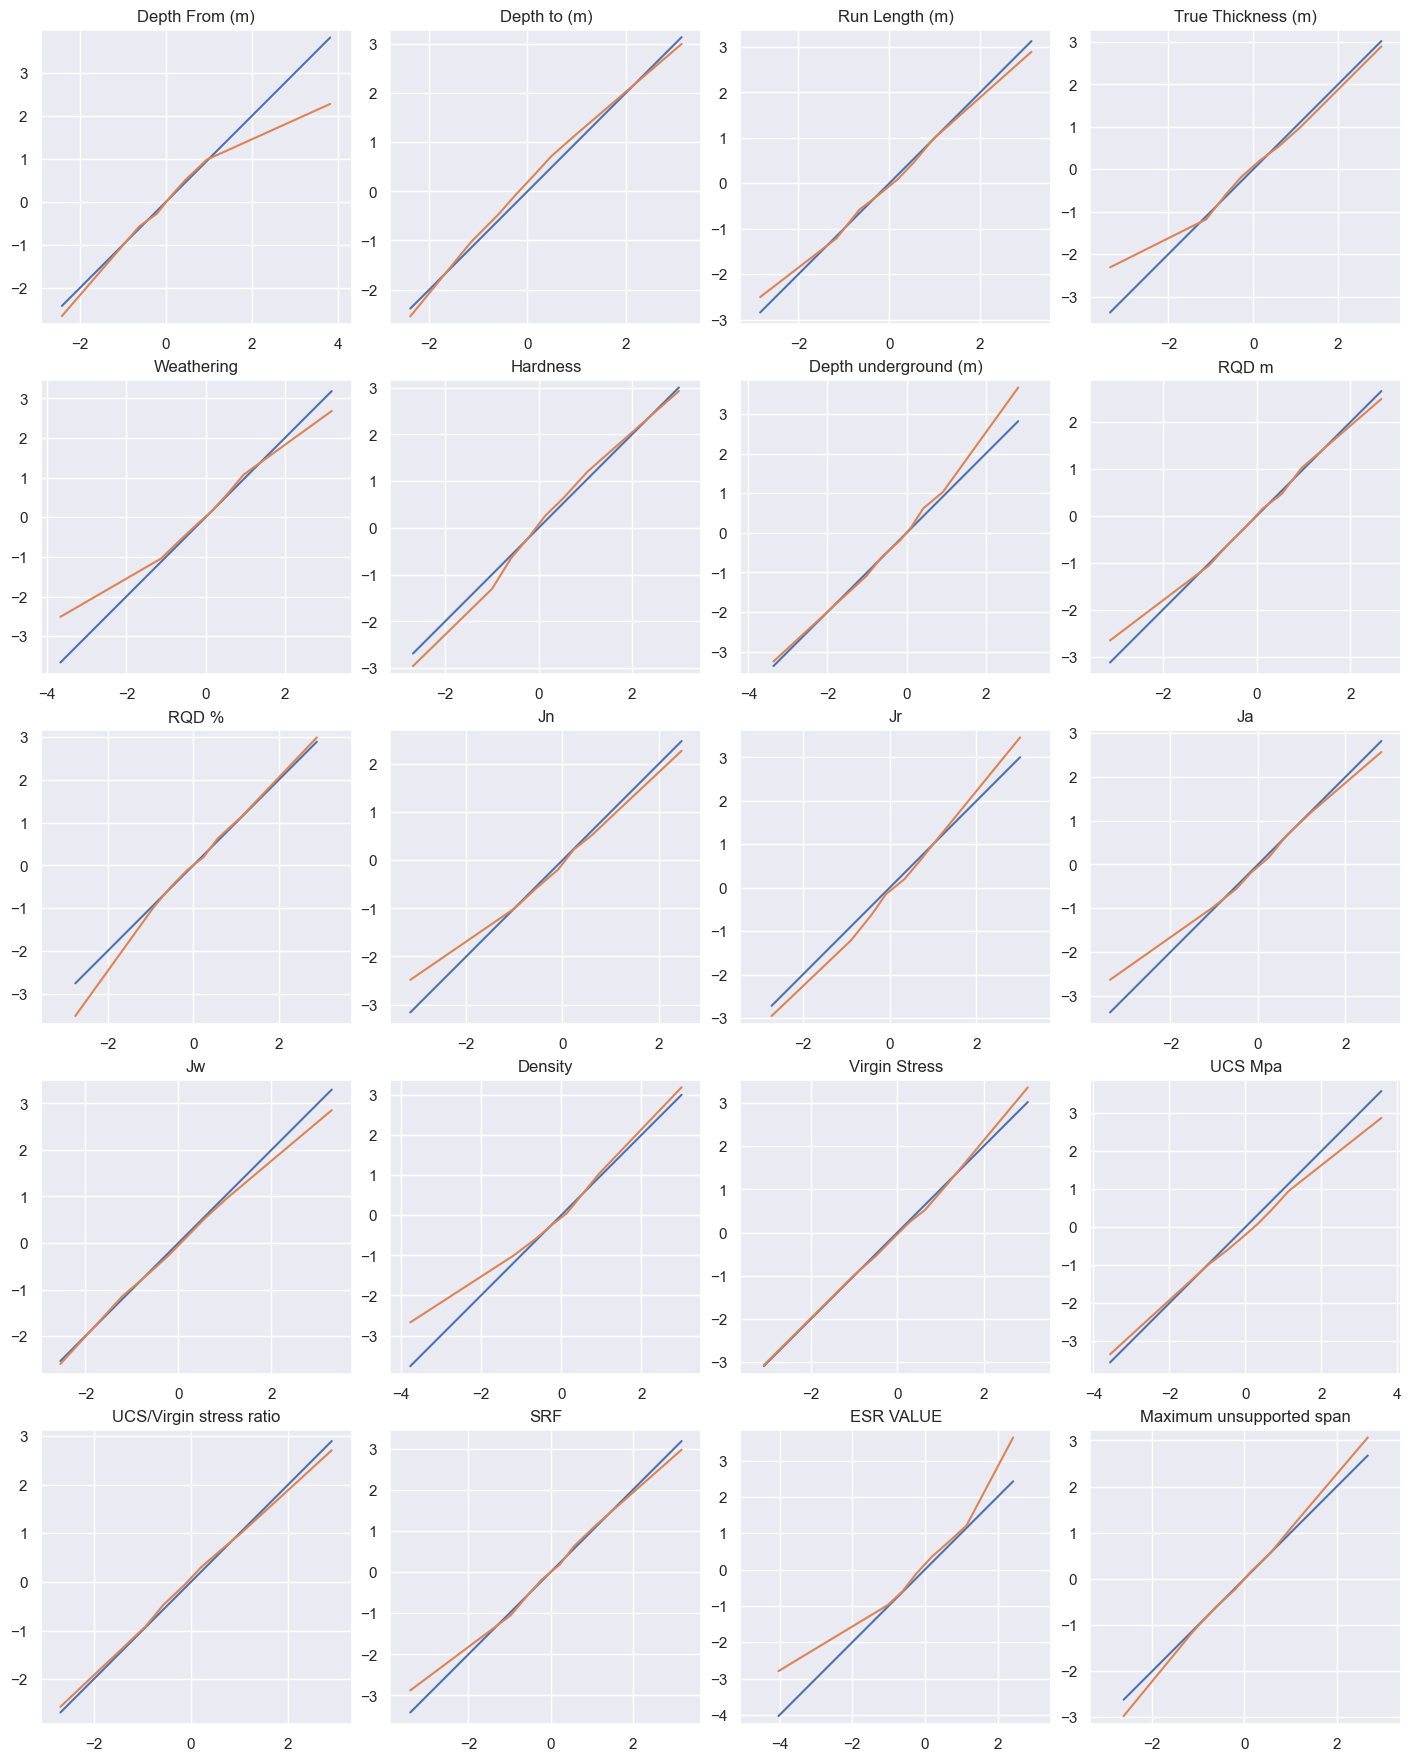

In [7]:
data = pd.DataFrame(np.random.randn(679,20), columns=['Depth From (m)', 'Depth to (m)', 'Run Length (m)',
       'True Thickness (m)', 'Weathering', 'Hardness',
       'Depth underground (m)', 'RQD m', 'RQD %', 'Jn', 'Jr',
       'Ja', 'Jw', 'Density', 'Virgin Stress', 'UCS Mpa',
       'UCS/Virgin stress ratio', 'SRF',  'ESR VALUE',
       'Maximum unsupported span'])
y=np.random.randint(0,2, (679,1))

#something to plot
data1=data[y==1].quantile(np.linspace(0,1,8))
data0=data[y==0].quantile(np.linspace(0,1,8))


from math import ceil

N=20

fig, axs = plt.subplots( ncols=4, nrows=ceil(N/4), layout='constrained',
                         figsize=(3.5 * 4, 3.5 * ceil(N/4)) )

for (i, var), ax in zip(enumerate(data.iloc[:,:N]), axs.flat):
    ax.set_title(var)
    ax.axis('equal')
    ax.plot(data0.loc[:][var], data0.loc[:][var])
    ax.plot(data0.loc[:][var], data1.loc[:][var])

## 2.3 Replacing the NaN values

In [8]:
data = pd.read_excel(r"D:\UJ-ACCENTURE\Capstone Project\complete_data.xlsx")

data = data.dropna()

## 2.4 Encoding the catergorical data

In [9]:
# loop through the columns in the dataframe where type is "object"
for col in data.select_dtypes(include=["object"]).columns:
    #initialize a label encoder
    label_encoder = LabelEncoder()
    
    #fit the encoder to the unique values in the columns
    label_encoder.fit(data[col].unique())
    
    #transform the column usinf the encode
    data[col] = label_encoder.transform(data[col])
    
    #print the columns names and the unique encoded values
    print(f"{col}: {data[col].unique()}")

Borehole ID: [ 6  7  8  9 10  0  1  2  3  4  5]
Geotech Domain: [2 1 0]
Jn Description: [39 34  4 20 22 31 27 47 42 37 35  5 21 23 32 28 49 48 38 36  3 19  7 24
 25 40 10 11  0 16  8 29 45 43 14 12  1 17  9 30 46 44 15 13  2 18  6 26
 41 33]
Jr Description: [44 40  0 42 21 24 22 28 32 30 45 49 47 41  1 43 26 25 23  4  9 56 14 33
 52 38  2  7 54 11 50 36 19 16  5 10 57 15 34 53 39  3  8 55 12 51 37 20
 17 13  6 18 27 31 29 48 46 35]
Ja Description: [317 234 233 232 228 227 226 225 223 224 291 290 289 288 287 286 231 230
 229 171 169 173 167 199 175 292 201 203 205 207 209 211 213 215 217 219
 221 177 179 181 183 185 187 189 191 193 195 197 294 296 298 300 302 304
 306 308 310 312 314  58  30  44   2  16  60  62  64  70  32  34  38  40
  42  46  48  50  52  54  56   4   6   8  10  12  14  18  20  22  24  26
  28 120 134 106  72  86 122 124 126 128 130 132 136 138 140 142 144 146
 108 110 112 114 116 118  76  78  92  94  96 172 170 174 168 200 176 293
 202 204 208 210 212 214 216 218 220 

In [10]:
data.head()

,Borehole ID,Depth From (m),Depth to (m),Run Length (m),True Thickness (m),Weathering,Hardness,Geotech Domain,Jn Description,Jr Description,...,Density,Virgin Stress,UCS Mpa,UCS/Virgin stress ratio,SRF,Q Value,LNQ,RMR,ESR VALUE,Maximum unsupported span
3,6,9.42,10.6,1.18,8.47,3.0,3.0,2,39,44,...,27000.0,3.173143,50.0,15.757250,7.5,0.452212,-0.793604,36.857560,1.0,1.456018
6,6,12.50,14.0,1.50,11.18,3.0,2.0,2,34,40,...,27000.0,3.173143,50.0,15.757250,5.0,0.069333,-2.668829,19.980535,1.6,1.100340
7,6,14.00,15.0,1.00,11.98,3.0,3.0,2,4,0,...,27000.0,3.173143,50.0,15.757250,7.5,0.002000,-6.214608,-11.931473,1.3,0.216464
8,6,15.00,16.6,1.60,13.26,2.0,3.0,1,20,42,...,27000.0,2.574536,135.0,52.436625,1.0,0.000564,-7.480038,-23.320340,1.0,0.100372
9,6,16.60,18.1,1.50,14.46,2.0,3.0,1,22,21,...,27000.0,2.574536,135.0,52.436625,1.0,2.518519,0.923671,52.313038,0.8,2.315144


In [11]:
data.info()
data.describe()
data.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 505 entries, 3 to 596
Data columns (total 30 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Borehole ID               505 non-null    int32  
 1   Depth From (m)            505 non-null    float64
 2   Depth to (m)              505 non-null    float64
 3   Run Length (m)            505 non-null    float64
 4   True Thickness (m)        505 non-null    float64
 5   Weathering                505 non-null    float64
 6   Hardness                  505 non-null    float64
 7   Geotech Domain            505 non-null    int32  
 8   Jn Description            505 non-null    int32  
 9   Jr Description            505 non-null    int32  
 10  Ja Description            505 non-null    int32  
 11  Jw Description            505 non-null    int32  
 12  ESR Conditions            505 non-null    int32  
 13  Depth underground (m)     505 non-null    float64
 14  RQD m     

Borehole ID                 0
Depth From (m)              0
Depth to (m)                0
Run Length (m)              0
True Thickness (m)          0
Weathering                  0
Hardness                    0
Geotech Domain              0
Jn Description              0
Jr Description              0
Ja Description              0
Jw Description              0
ESR Conditions              0
Depth underground (m)       0
RQD m                       0
RQD %                       0
Jn                          0
Jr                          0
Ja                          0
Jw                          0
Density                     0
Virgin Stress               0
UCS Mpa                     0
UCS/Virgin stress ratio     0
SRF                         0
Q Value                     0
LNQ                         0
RMR                         0
ESR VALUE                   0
Maximum unsupported span    0
dtype: int64

In [12]:
data.head()

,Borehole ID,Depth From (m),Depth to (m),Run Length (m),True Thickness (m),Weathering,Hardness,Geotech Domain,Jn Description,Jr Description,...,Density,Virgin Stress,UCS Mpa,UCS/Virgin stress ratio,SRF,Q Value,LNQ,RMR,ESR VALUE,Maximum unsupported span
3,6,9.42,10.6,1.18,8.47,3.0,3.0,2,39,44,...,27000.0,3.173143,50.0,15.757250,7.5,0.452212,-0.793604,36.857560,1.0,1.456018
6,6,12.50,14.0,1.50,11.18,3.0,2.0,2,34,40,...,27000.0,3.173143,50.0,15.757250,5.0,0.069333,-2.668829,19.980535,1.6,1.100340
7,6,14.00,15.0,1.00,11.98,3.0,3.0,2,4,0,...,27000.0,3.173143,50.0,15.757250,7.5,0.002000,-6.214608,-11.931473,1.3,0.216464
8,6,15.00,16.6,1.60,13.26,2.0,3.0,1,20,42,...,27000.0,2.574536,135.0,52.436625,1.0,0.000564,-7.480038,-23.320340,1.0,0.100372
9,6,16.60,18.1,1.50,14.46,2.0,3.0,1,22,21,...,27000.0,2.574536,135.0,52.436625,1.0,2.518519,0.923671,52.313038,0.8,2.315144


<Axes: >

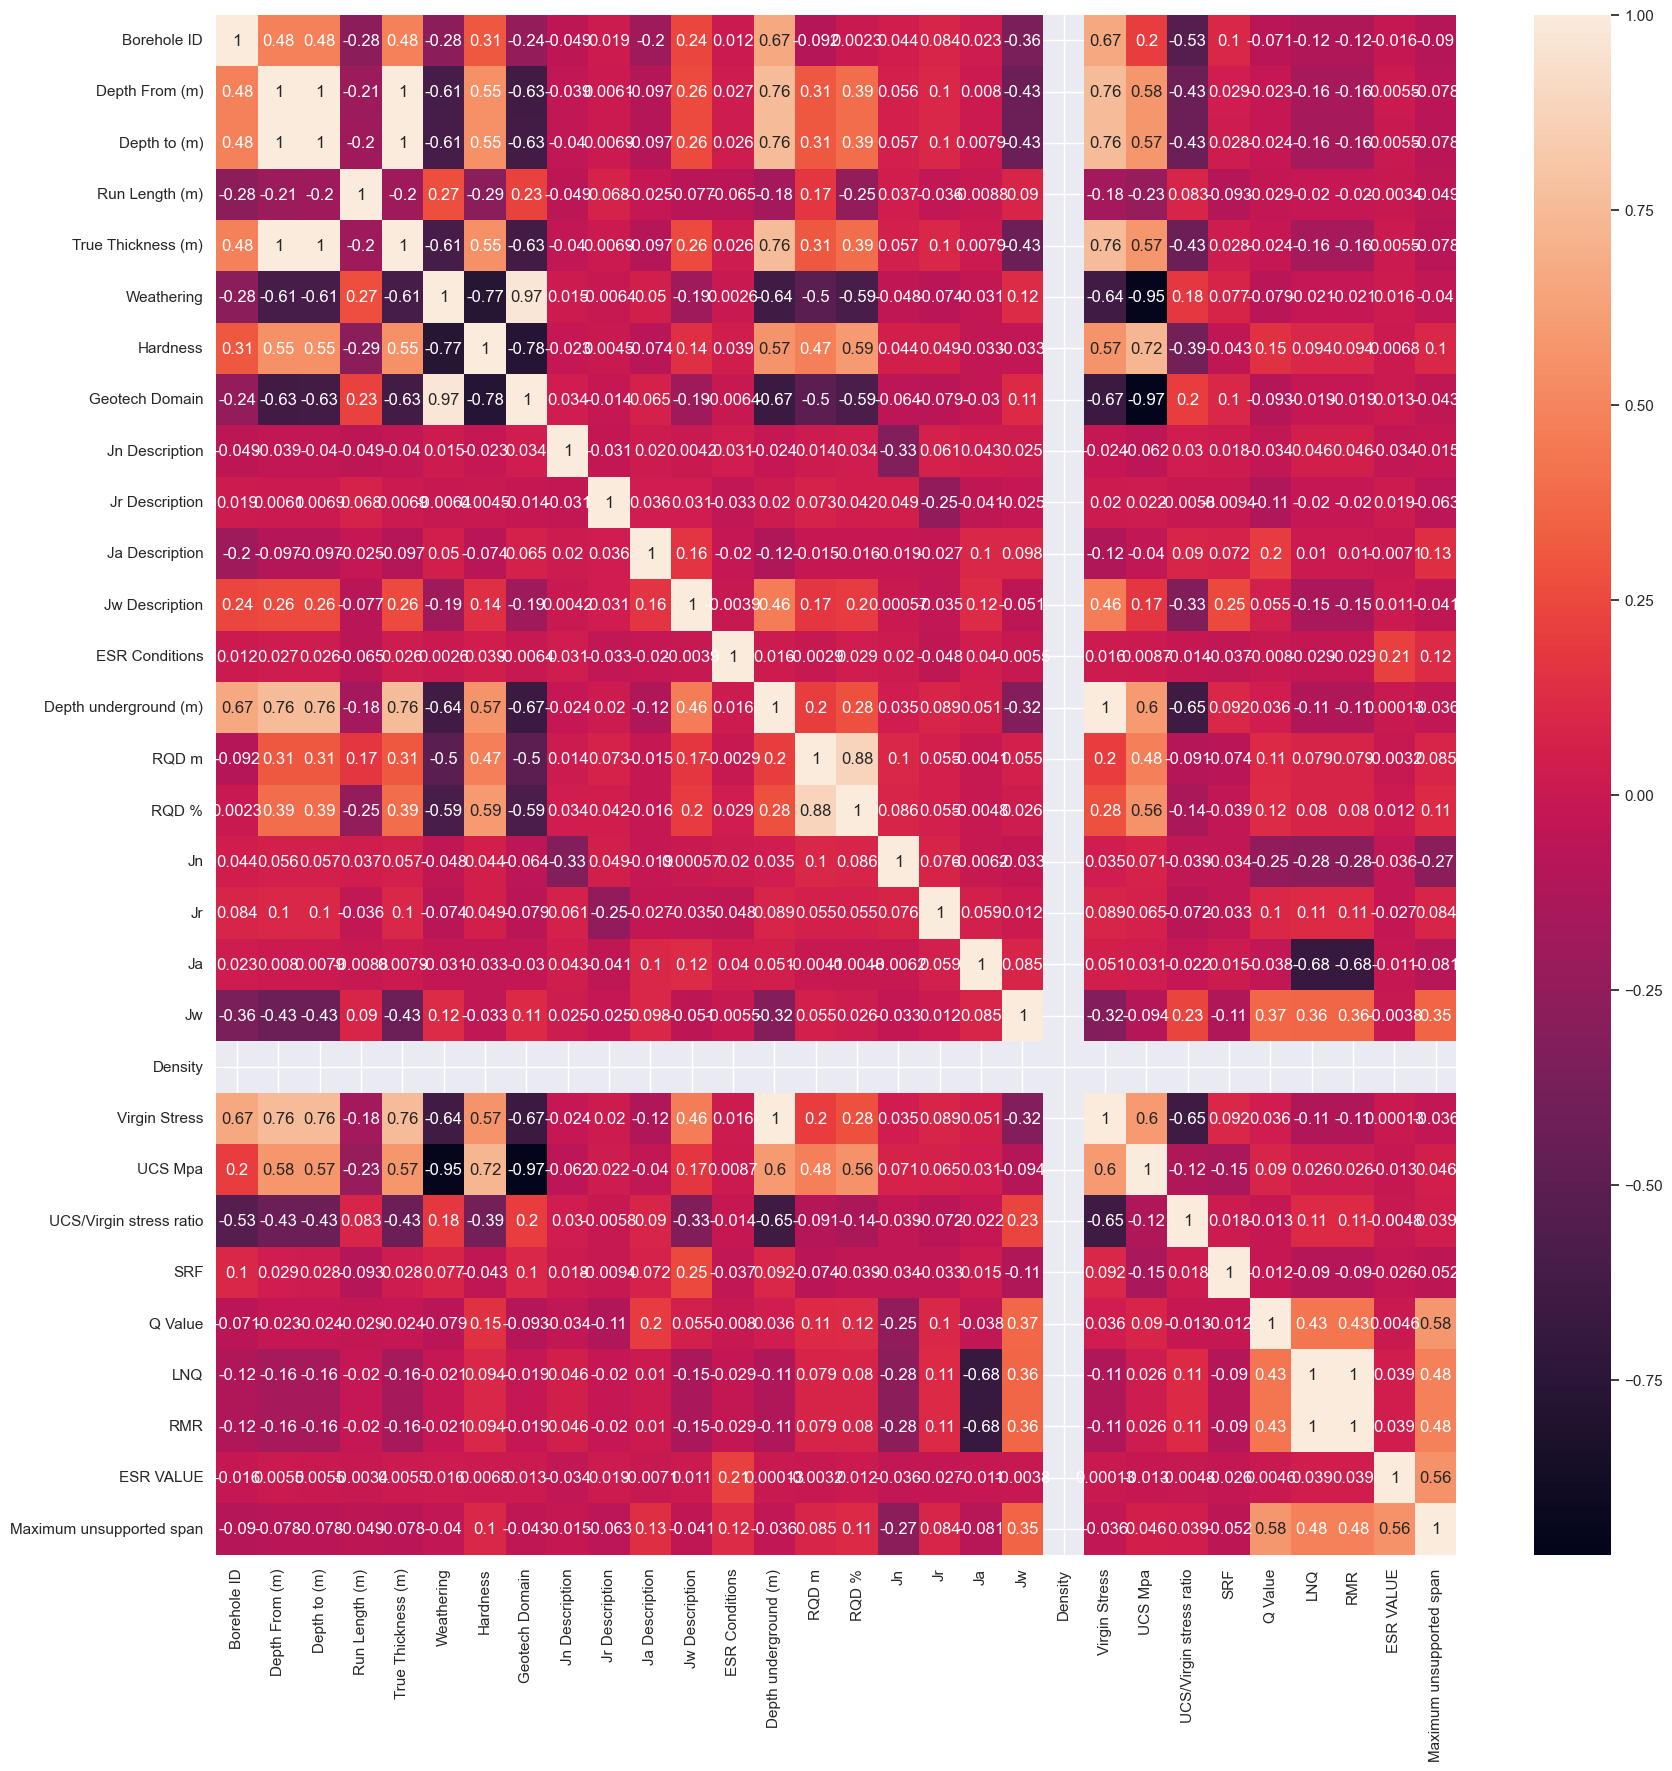

In [13]:
plt.figure(figsize=(20, 20))
sns.heatmap(data.corr(), fmt='0.2g', annot=True)

# 3 Dropping columns to target each input and output

In [57]:
columns_to_drop_for_Jn = ['Borehole ID', 'Depth From (m)', 'Depth to (m)', 'Run Length (m)',
       'True Thickness (m)', 'Weathering', 'Hardness', 'Geotech Domain',
        'Jr Description', 'Ja Description', 'Jw Description',
       'ESR Conditions', 'Depth underground (m)', 'RQD m', 'RQD %', 'Jr',
       'Ja', 'Jw', 'Density', 'Virgin Stress', 'UCS Mpa',
       'UCS/Virgin stress ratio', 'SRF', 'Q Value', 'LNQ', 'RMR', 'ESR VALUE',
       'Maximum unsupported span']

df1 = data.drop(columns_to_drop_for_Jn, axis=1)

x1 = df1.iloc[:,:1]
y1 = df1.iloc[:,1:]

columns_to_drop_for_Ja = ['Borehole ID', 'Depth From (m)', 'Depth to (m)', 'Run Length (m)',
       'True Thickness (m)', 'Weathering', 'Hardness', 'Geotech Domain',
       'Jn Description', 'Jr Description', 'Jw Description',
       'ESR Conditions', 'Depth underground (m)', 'RQD m', 'RQD %', 'Jn', 'Jr',
        'Jw', 'Density', 'Virgin Stress', 'UCS Mpa',
       'UCS/Virgin stress ratio', 'SRF', 'Q Value', 'LNQ', 'RMR', 'ESR VALUE',
       'Maximum unsupported span']

df2 = data.drop(columns_to_drop_for_Ja, axis=1)

x2 = df1.iloc[:,:1]
y2 = df1.iloc[:,1:]

columns_to_drop_for_Jr = ['Borehole ID', 'Depth From (m)', 'Depth to (m)', 'Run Length (m)',
       'True Thickness (m)', 'Weathering', 'Hardness', 'Geotech Domain',
       'Jn Description', 'Ja Description', 'Jw Description',
       'ESR Conditions', 'Depth underground (m)', 'RQD m', 'RQD %', 'Jn',
       'Ja', 'Jw', 'Density', 'Virgin Stress', 'UCS Mpa',
       'UCS/Virgin stress ratio', 'SRF', 'Q Value', 'LNQ', 'RMR', 'ESR VALUE',
       'Maximum unsupported span']

df3 = data.drop(columns_to_drop_for_Jr, axis=1)
x3 = df3.iloc[:,:1]
y3 = df3.iloc[:,1:]

columns_to_drop_for_Jw =['Borehole ID', 'Depth From (m)', 'Depth to (m)', 'Run Length (m)',
       'True Thickness (m)', 'Weathering', 'Hardness', 'Geotech Domain',
       'Jn Description', 'Jr Description', 'Ja Description', 
       'ESR Conditions', 'Depth underground (m)', 'RQD m', 'RQD %', 'Jn', 'Jr',
       'Ja',  'Density', 'Virgin Stress', 'UCS Mpa',
       'UCS/Virgin stress ratio', 'SRF', 'Q Value', 'LNQ', 'RMR', 'ESR VALUE',
       'Maximum unsupported span']

df4 = data.drop(columns_to_drop_for_Jw, axis=1)
x4 = df4.iloc[:,:1]
y4 = df4.iloc[:,1:]

columns_to_drop_for_rqd = ['Borehole ID','Geotech Domain',
                           'Jn Description', 'Jr Description', 'Ja Description', 'Jw Description',
                           'ESR Conditions', 'Depth underground (m)','Jn', 'Jr',
                           'Ja', 'Jw', 'Density', 'Virgin Stress', 'UCS Mpa',
                           'UCS/Virgin stress ratio', 'SRF', 'Q Value', 'LNQ', 'RMR', 'ESR VALUE',
                           'Maximum unsupported span','RQD m','Run Length (m)']

df5 = data.drop(columns_to_drop_for_rqd, axis=1)
x5 = df5.iloc[:,:3]
y5 = df5.iloc[:,3:]

columns_to_drop_for_srf = ['Borehole ID', 'Depth From (m)', 'Depth to (m)', 'Run Length (m)',
       'True Thickness (m)', 'Weathering', 'Hardness', 'Geotech Domain',
       'Jn Description', 'Jr Description', 'Ja Description', 'Jw Description',
       'ESR Conditions', 'Depth underground (m)', 'RQD m', 'RQD %', 'Jn', 'Jr',
       'Ja', 'Jw', 'Density', 'Virgin Stress', 'UCS Mpa',
         'Q Value', 'LNQ', 'RMR', 'ESR VALUE',
       'Maximum unsupported span']

df6 = data.drop(columns_to_drop_for_srf, axis=1)
x6 = df6.iloc[:,:1]
y6 = df6.iloc[:,1:]


columns_to_drop_for_ucs_vsr = ['Borehole ID', 'Depth From (m)', 'Depth to (m)', 'Run Length (m)',
       'True Thickness (m)', 'Weathering', 'Hardness',
       'Jn Description', 'Jr Description', 'Ja Description', 'Jw Description',
       'ESR Conditions', 'RQD m', 'RQD %', 'Jn', 'Jr',
       'Ja', 'Jw', 'Virgin Stress',
        'SRF', 'Q Value', 'LNQ', 'RMR', 'ESR VALUE',
       'Maximum unsupported span']

df7 = data.drop(columns_to_drop_for_ucs_vsr, axis=1)
x7 = df7.iloc[:,:4]
y7 = df7.iloc[:,4:]


columns_to_drop_for_q = ['Borehole ID', 'Depth From (m)', 'Depth to (m)', 'Run Length (m)',
       'True Thickness (m)', 'Weathering', 'Hardness', 'Geotech Domain',
       'Jn Description', 'Jr Description', 'Ja Description', 'Jw Description',
       'ESR Conditions', 'Depth underground (m)', 'RQD m', 
        'Density', 'Virgin Stress', 'UCS Mpa',
       'UCS/Virgin stress ratio', 'SRF',  'LNQ', 'RMR', 'ESR VALUE',
       'Maximum unsupported span']

df8 = data.drop(columns_to_drop_for_q, axis=1)
x8 = df8.iloc[:,:5]
y8 = df8.iloc[:,5:]



columns_to_drop_for_esr = ['Borehole ID', 'Depth From (m)', 'Depth to (m)', 'Run Length (m)',
       'True Thickness (m)', 'Weathering', 'Hardness', 'Geotech Domain',
       'Jn Description', 'Jr Description', 'Ja Description', 'Jw Description',
        'Depth underground (m)', 'RQD m', 'RQD %', 'Jn', 'Jr',
       'Ja', 'Jw', 'Density', 'Virgin Stress', 'UCS Mpa',
       'UCS/Virgin stress ratio', 'SRF', 'Q Value', 'LNQ', 'RMR', 
       'Maximum unsupported span']

df9 = data.drop(columns_to_drop_for_esr, axis=1)
x9 = df9.iloc[:,:1]
y9 = df9.iloc[:,1:]


columns_to_drop_for_rmr = ['Borehole ID', 'Depth From (m)', 'Depth to (m)', 'Run Length (m)',
       'True Thickness (m)', 'Weathering', 'Hardness', 'Geotech Domain',
       'Jn Description', 'Jr Description', 'Ja Description', 'Jw Description',
       'ESR Conditions', 'Depth underground (m)', 'RQD m', 'RQD %', 'Jn', 'Jr',
       'Ja', 'Jw', 'Density', 'Virgin Stress', 'UCS Mpa',
       'UCS/Virgin stress ratio', 'SRF' , 'ESR VALUE',
       'Maximum unsupported span']

df10 = data.drop(columns_to_drop_for_rmr, axis=1)
x10 = df10.iloc[:,:2]
y10 = df10.iloc[:,2:]

columns_to_drop_for_us = ['Borehole ID', 'Depth From (m)', 'Depth to (m)', 'Run Length (m)',
       'True Thickness (m)', 'Weathering', 'Hardness', 'Geotech Domain',
       'Jn Description', 'Jr Description', 'Ja Description', 'Jw Description',
       'ESR Conditions', 'Depth underground (m)', 'RQD m', 'RQD %', 'Jn', 'Jr',
       'Ja', 'Jw', 'Density', 'Virgin Stress', 'UCS Mpa',
       'UCS/Virgin stress ratio', 'SRF', 'LNQ', 'RMR']

df11 = data.drop(columns_to_drop_for_us, axis=1)
x11 = df11.iloc[:,:2]
y11 = df11.iloc[:,2:]

# 4 Building the different models for the different input and output
## 4.1 Model for Jn

In [15]:
df1.head()

,Jn Description,Jn
3,39,4
6,34,12
7,4,15
8,20,20
9,22,3


In [16]:
x1_train, x1_test, y1_train, y1_test = train_test_split(x1, y1, train_size = 0.9, random_state=1)


#Standardize the data
scaler = StandardScaler() 
scaler.fit(x1)
x1_train = scaler.transform(x1_train)
x1_test = scaler.transform(x1_test)



mlp_Jn = MLPClassifier(hidden_layer_sizes=(60,60,60),max_iter=20000)

mlp_Jn.fit(x1_train,y1_train.values.ravel())


predicted_mlp_Jn= mlp_Jn.predict(x1_test)
Accuracy_MLP_Jn = metrics.accuracy_score(predicted_mlp_Jn, y1_test)
Precission_MLP_Jn = metrics.precision_score(predicted_mlp_Jn, y1_test,average='micro')
Recall_MLP_Jn = metrics.recall_score(predicted_mlp_Jn, y1_test,average='micro')
F1_score_MLP_Jn = metrics.recall_score(predicted_mlp_Jn, y1_test,average='micro')

print("=========================================================================")

print("1. Results using MLP classifier for Jn")
print("==========================================================================")
print('Accuracy for Jn [MLPClassifier]: %.3f' % (Accuracy_MLP_Jn*100))
print('Precision for Jn [MLPClassifier]: %.3f' % (Precission_MLP_Jn*100))
print('Recall for Jn [MLPClassifier]: %.3f' % (Recall_MLP_Jn*100))
print('F1 Score for Jn [MLPClassifier]: %.3f' % (F1_score_MLP_Jn*100))
print("==========================================================================")


# all parameters not specified are set to their defaults
model_LR_Jn = LogisticRegression()
model_LR_Jn.fit(x1_train, y1_train.values.ravel())


#Predict Output
predicted_Jn= model_LR_Jn.predict(x1_test) 



print("2. Logistic Regression results for Jn")
print("=========================================================================")
#Model Accuracy, how often is the classifier correct?
Accuracy_LR_Jn = metrics.accuracy_score(predicted_Jn, y1_test)
Precission_LR_Jn = metrics.precision_score(predicted_Jn, y1_test,average='micro')
Recall_LR_Jn = metrics.recall_score(predicted_Jn, y1_test,average='micro')
F1_score_LR_Jn = metrics.f1_score(predicted_Jn, y1_test,average='micro')


print('Accuracy for Jn [Logistic Regression]: %.3f' % (Accuracy_LR_Jn*100))
print('Accuracy for Jn [Logistic Regression]: %.3f' % (Precission_LR_Jn*100))
print('Accuracy for Jn [Logistic Regression]: %.3f' % (Recall_LR_Jn*100))
print('Accuracy for Jn [Logistic Regression]: %.3f' % (F1_score_LR_Jn*100))
print("=========================================================================")



dt_model_Jn = RandomForestClassifier()
rf_clf_Jn = dt_model_Jn.fit(x1_train, y1_train.values.ravel())

# Predict targets on the testing data
test_random_forest_Jn = rf_clf_Jn.predict(x1_test)

Accuracy_RF_Jn = accuracy_score(y1_test, test_random_forest_Jn)
Recall_RF_Jn = recall_score(y1_test, test_random_forest_Jn, average='micro')
Precission_RF_Jn = precision_score(y1_test, test_random_forest_Jn,average='micro')
F1_score_RF_Jn = matthews_corrcoef(y1_test, test_random_forest_Jn)



print("3. Random Forest Results for Jn")

print("=========================================================================")
print('Accuracy for Jn [Random Forest]: %.3f' % (Accuracy_RF_Jn*100))
print('Recall for Jn [Random Forest]: %.3f' % (Recall_RF_Jn*100))
print('Precision for Jn [Random Forest]: %.3f' % (Precission_RF_Jn*100))
print('F1 Score for Jn [Random Forest]: %.3f' % (F1_score_RF_Jn*100))

print("=========================================================================")


ababoost_Jn = AdaBoostClassifier(estimator=RandomForestClassifier(max_depth=15),
                           n_estimators=100, 
                           learning_rate=1.0, 
                           algorithm='SAMME.R')
ababoost_Jn = ababoost_Jn.fit(x1_train, y1_train.values.ravel())

# Predict targets on the testing data
test_predictions_Jn = ababoost_Jn.predict(x1_test)
Accuracy_AC_Jn = accuracy_score(y1_test, test_predictions_Jn)
Recall_AC_Jn = recall_score(y1_test, test_predictions_Jn,average='micro')
Precission_AC_Jn = precision_score(y1_test, test_predictions_Jn,average='micro')
F1_score_AC_Jn = matthews_corrcoef(y1_test, test_predictions_Jn)


print("4. AdaBoost Claasifier for Jn")
print("=========================================================================")
print('Accuracy for Jn [AdaBoost Claasifier]: %.3f' % (Accuracy_AC_Jn*100))
print('Precission for Jn [AdaBoost Claasifier]: %.3f' % (Precission_AC_Jn*100))
print('Recall for Jn [AdaBoost Claasifier]: %.3f' % (Recall_AC_Jn*100))
print('F1 Score for Jn [AdaBoost Claasifier]: %.3f' % (F1_score_AC_Jn*100))
print("=========================================================================")


extra_tree_Jn = ExtraTreesClassifier()
extra_tree_Jn = extra_tree_Jn.fit(x1_train, y1_train.values.ravel())

# Predict targets on the testing data
extra_tree_test_predictions_Jn = extra_tree_Jn.predict(x1_test)

Accuracy_ETC_Jn = accuracy_score(y1_test, extra_tree_test_predictions_Jn)
Recall_ETC_Jn = recall_score(y1_test, extra_tree_test_predictions_Jn,average='micro')
Precission_ETC_Jn = precision_score(y1_test, extra_tree_test_predictions_Jn,average='micro')
F1_score_ETC_Jn = matthews_corrcoef(y1_test, extra_tree_test_predictions_Jn)

print("5. Extra Tree Classifier for Jn")
print("=========================================================================")
print('Accuracy for Jn [ExtraTreesClassifier]: %.3f' % (Accuracy_ETC_Jn*100))
print('Precission for Jn [ExtraTreesClassifier]: %.3f' % (Precission_ETC_Jn*100))
print('Recall for Jn [ExtraTreesClassifier]: %.3f' % (Recall_ETC_Jn*100))
print('F1 Score for Jn [ExtraTreesClassifier]: %.3f' % (F1_score_ETC_Jn*100))
print("=========================================================================")


gradient_boosting_Jn = GradientBoostingClassifier()
gradient_boosting_Jn = gradient_boosting_Jn.fit(x1_train, y1_train.values.ravel())

# Predict targets on the testing data
gradient_boosting_test_predictions_Jn = gradient_boosting_Jn.predict(x1_test) 

Accuracy_GBC_Jn = accuracy_score(y1_test, gradient_boosting_test_predictions_Jn)
Recall_GBC_Jn = recall_score(y1_test, gradient_boosting_test_predictions_Jn,average='micro')
Precission_GBC_Jn = precision_score(y1_test, gradient_boosting_test_predictions_Jn,average='micro')
F1_score_GBC_Jn = matthews_corrcoef(y1_test, gradient_boosting_test_predictions_Jn)


print("6. Gradient Boosting Classifier for Jn")
print("=========================================================================")
print('Accuracy for Jn [Gradient Boosting Classifier]: %.3f' % (Accuracy_GBC_Jn*100))
print('Precission for Jn [Gradient Boosting Classifier: %.3f' % (Precission_GBC_Jn*100))
print('Recall for Jn [Gradient Boosting Classifier]: %.3f' % (Recall_GBC_Jn*100))
print('F1 Score for Jn [Gradient Boosting Classifier]: %.3f' % (F1_score_GBC_Jn*100))
print("=========================================================================")

svm_Jn = SVC(kernel='linear')
svm_Jn = svm_Jn.fit(x1_train, y1_train.values.ravel())

#Predict targets on the testing data
svm_test_predictions_Jn = svm_Jn.predict(x1_test)

# Checking the performance
Accuracy_SVM_Jn = accuracy_score(y1_test, svm_test_predictions_Jn)
Precission_SVM_Jn = recall_score(y1_test, svm_test_predictions_Jn,average='micro')
Recall_SVM_Jn = precision_score(y1_test, svm_test_predictions_Jn,average='micro')
F1_score_SVM_Jn = matthews_corrcoef(y1_test, svm_test_predictions_Jn)


print("7. Support Vector Machine for Jn")
print("=========================================================================")
print('Accuracy for Jn [Support Vector Machine]: %.3f' % (Accuracy_SVM_Jn*100))
print('Precission for Jn [Support Vector Machine]: %.3f' % (Precission_SVM_Jn*100))
print('Recall for Jn [Support Vector Machine]: %.3f' % (Recall_SVM_Jn*100))
print('F1 Score for Jn [Support Vector Machine]: %.3f' % (F1_score_SVM_Jn*100))
print("=========================================================================")


1. Results using MLP classifier for Jn
Accuracy for Jn [MLPClassifier]: 88.235
Precision for Jn [MLPClassifier]: 88.235
Recall for Jn [MLPClassifier]: 88.235
F1 Score for Jn [MLPClassifier]: 88.235
2. Logistic Regression results for Jn
Accuracy for Jn [Logistic Regression]: 17.647
Accuracy for Jn [Logistic Regression]: 17.647
Accuracy for Jn [Logistic Regression]: 17.647
Accuracy for Jn [Logistic Regression]: 17.647
3. Random Forest Results for Jn
Accuracy for Jn [Random Forest]: 100.000
Recall for Jn [Random Forest]: 100.000
Precision for Jn [Random Forest]: 100.000
F1 Score for Jn [Random Forest]: 100.000
4. AdaBoost Claasifier for Jn
Accuracy for Jn [AdaBoost Claasifier]: 100.000
Precission for Jn [AdaBoost Claasifier]: 100.000
Recall for Jn [AdaBoost Claasifier]: 100.000
F1 Score for Jn [AdaBoost Claasifier]: 100.000
5. Extra Tree Classifier for Jn
Accuracy for Jn [ExtraTreesClassifier]: 100.000
Precission for Jn [ExtraTreesClassifier]: 100.000
Recall for Jn [ExtraTreesClassifier]:

## 4.2 Model Ja

In [17]:
df2.head()

,Ja Description,Ja
3,317,1.0
6,234,2.0
7,233,4.0
8,232,6.0
9,228,3.0


In [18]:
y2=y2.astype('int')

x2_train, x2_test, y2_train, y2_test = train_test_split(x2,y2, test_size=0.2, random_state=42)

x2_train = np.array(x2_train)
x2_test = np.array(x2_test)


scaler = StandardScaler()
scaler.fit(x2_train,y2_train)

StandardScaler(copy=True, with_mean=True, with_std=True)
x2_train = scaler.transform(x2_train)
x2_test = scaler.transform(x2_test)


mlp_Ja = MLPClassifier(hidden_layer_sizes=(60,60,60),max_iter=20000)

mlp_Ja.fit(x2_train,y2_train.values.ravel())


predicted_Ja= mlp_Ja.predict(x2_test)
Accuracy_MLP_Ja = metrics.accuracy_score(predicted_Ja, y2_test)
Precission_MLP_Ja = metrics.precision_score(predicted_Ja, y2_test,average='micro')
Recall_MLP_Ja = metrics.recall_score(predicted_Ja, y2_test,average='micro')
F1_score_MLP_Ja = metrics.recall_score(predicted_Ja, y2_test,average='micro')


print("==========================================================================")
print("1. Results using MLP classifier for Ja")
print("==========================================================================")
print('Accuracy for Ja [MLPClassifier]: %.3f' % (Accuracy_MLP_Ja*100))
print('Precision for Ja [MLPClassifier]: %.3f' % (Precission_MLP_Ja*100))
print('Recall for Ja [MLPClassifier]: %.3f' % (Recall_MLP_Ja*100))
print('F1 Score for Ja [MLPClassifier]: %.3f' % (F1_score_MLP_Ja*100))
print("==========================================================================")



dt_model_Ja = RandomForestClassifier()
rf_clf_Ja = dt_model_Ja.fit(x2_train,y2_train.values.ravel())

# Predict targets on the testing data
test_random_forest_Ja = rf_clf_Ja.predict(x2_test)

Accuracy_RF_Ja = accuracy_score(y2_test, test_random_forest_Ja)
Recall_RF_Ja = recall_score(y2_test, test_random_forest_Ja, average='micro')
Precission_RF_Ja = precision_score(y2_test, test_random_forest_Ja,average='micro')
F1_score_RF_Ja = matthews_corrcoef(y2_test, test_random_forest_Ja)

print("2. Results using Random Forest results for Ja")
print("==========================================================================")
print('Accuracy for Ja [Random Forest]: %.3f' % (Accuracy_RF_Ja*100))
print('Precision for Ja [Random Forest]: %.3f' % (Precission_RF_Ja*100))
print('Recall for Ja [Random Forest]: %.3f' % (Recall_RF_Ja*100))
print('F1 Score for Ja [Random Forest]: %.3f' % (F1_score_RF_Ja*100))
print("==========================================================================")


# all parameters not specified are set to their defaults
model_LR_Ja = LogisticRegression()
model_LR_Ja.fit(x2_train, y2_train.values.ravel())


#Predict Output
predicted_Ja= model_LR_Ja.predict(x2_test) 



print("3. Linear Regression results for Ja")
print("=========================================================================")
#Model Accuracy, how often is the classifier correct?
Accuracy_LR_Ja = metrics.accuracy_score(predicted_Ja, y2_test)
Precission_LR_Ja = metrics.precision_score(predicted_Ja, y2_test,average='micro')
Recall_LR_Ja = metrics.recall_score(predicted_Ja, y2_test,average='micro')
F1_score_LR_Ja = metrics.f1_score(predicted_Ja, y2_test,average='micro')


print('Accuracy for Ja [Logistic Regression]: %.3f' % (Accuracy_LR_Ja*100))
print('Accuracy for Ja [Logistic Regression]: %.3f' % (Precission_LR_Ja*100))
print('Accuracy for Ja [Logistic Regression]: %.3f' % (Recall_LR_Ja*100))
print('Accuracy for Ja [Logistic Regression]: %.3f' % (F1_score_LR_Ja*100))
print("=========================================================================")


ababoost_Ja = AdaBoostClassifier(estimator=RandomForestClassifier(max_depth=15),
                           n_estimators=100, 
                           learning_rate=1.0, 
                           algorithm='SAMME.R')
ababoost_Ja = ababoost_Ja.fit(x2_train, y2_train.values.ravel())

# Predict targets on the testing data
test_predictions_Ja = ababoost_Ja.predict(x2_test)
Accuracy_AC_Ja = accuracy_score(y2_test, test_predictions_Ja)
Recall_AC_Ja = recall_score(y2_test, test_predictions_Ja,average='micro')
Precission_AC_Ja = precision_score(y2_test, test_predictions_Ja,average='micro')
F1_score_AC_Ja = matthews_corrcoef(y2_test, test_predictions_Ja)


print("4. AdaBoost Claasifier for Ja")
print("=========================================================================")
print('Accuracy for Ja [AdaBoost Claasifier]: %.3f' % (Accuracy_AC_Ja*100))
print('Precission for Ja [AdaBoost Claasifier]: %.3f' % (Precission_AC_Ja*100))
print('Recall for Ja [AdaBoost Claasifier]: %.3f' % (Recall_AC_Ja*100))
print('F1 Score for Ja [AdaBoost Claasifier]: %.3f' % (F1_score_AC_Ja*100))
print("=========================================================================")



extra_tree_Ja = ExtraTreesClassifier()
extra_tree_Ja = extra_tree_Ja.fit(x2_train, y2_train.values.ravel())

# Predict targets on the testing data
extra_tree_test_predictions_Ja = extra_tree_Ja.predict(x2_test)

Accuracy_ETC_Ja = accuracy_score(y2_test, extra_tree_test_predictions_Ja)
Recall_ETC_Ja = recall_score(y2_test, extra_tree_test_predictions_Ja,average='micro')
Precission_ETC_Ja = precision_score(y2_test, extra_tree_test_predictions_Ja,average='micro')
F1_score_ETC_Ja = matthews_corrcoef(y2_test, extra_tree_test_predictions_Ja)

print("5. Extra Tree Classifier for Ja")
print("=========================================================================")
print('Accuracy for Ja [ExtraTreesClassifier]: %.3f' % (Accuracy_ETC_Ja*100))
print('Precission for Ja [ExtraTreesClassifier]: %.3f' % (Precission_ETC_Ja*100))
print('Recall for Ja [ExtraTreesClassifier]: %.3f' % (Recall_ETC_Ja*100))
print('F1 Score for Ja [ExtraTreesClassifier]: %.3f' % (F1_score_ETC_Ja*100))
print("=========================================================================")


gradient_boosting_Ja = GradientBoostingClassifier()
gradient_boosting_Ja = gradient_boosting_Ja.fit(x2_train, y2_train.values.ravel())

# Predict targets on the testing data
gradient_boosting_test_predictions_Ja = gradient_boosting_Ja.predict(x2_test) 

Accuracy_GBC_Ja = accuracy_score(y2_test, gradient_boosting_test_predictions_Ja)
Recall_GBC_Ja = recall_score(y2_test, gradient_boosting_test_predictions_Ja,average='micro')
Precission_GBC_Ja = precision_score(y2_test, gradient_boosting_test_predictions_Ja,average='micro')
F1_score_GBC_Ja = matthews_corrcoef(y2_test, gradient_boosting_test_predictions_Ja)


print("6. Gradient Boosting Classifier for Ja")
print("=========================================================================")
print('Accuracy for Ja [Gradient Boosting Classifier]: %.3f' % (Accuracy_GBC_Ja*100))
print('Precission for Ja [Gradient Boosting Classifier: %.3f' % (Precission_GBC_Ja*100))
print('Recall for Ja [Gradient Boosting Classifier]: %.3f' % (Recall_GBC_Ja*100))
print('F1 Score for Ja [Gradient Boosting Classifier]: %.3f' % (F1_score_GBC_Ja*100))
print("=========================================================================")

svm_Ja = SVC(kernel='linear')
svm_Ja = svm_Ja.fit(x2_train, y2_train.values.ravel())

#Predict targets on the testing data
svm_test_predictions_Ja = svm_Ja.predict(x2_test)

# Checking the performance
Accuracy_SVM_Ja = accuracy_score(y2_test, svm_test_predictions_Ja)
Precission_SVM_Ja = recall_score(y2_test, svm_test_predictions_Ja,average='micro')
Recall_SVM_Ja = precision_score(y2_test, svm_test_predictions_Ja,average='micro')
F1_score_SVM_Ja = matthews_corrcoef(y2_test, svm_test_predictions_Ja)


print("7. Support Vector Machine for Ja")
print("=========================================================================")
print('Accuracy for Ja [Support Vector Machine]: %.3f' % (Accuracy_SVM_Ja*100))
print('Precission for Ja [Support Vector Machine]: %.3f' % (Precission_SVM_Ja*100))
print('Recall for Ja [Support Vector Machine]: %.3f' % (Recall_SVM_Ja*100))
print('F1 Score for Ja [Support Vector Machine]: %.3f' % (F1_score_SVM_Ja*100))
print("=========================================================================")


1. Results using MLP classifier for Ja
Accuracy for Ja [MLPClassifier]: 20.792
Precision for Ja [MLPClassifier]: 20.792
Recall for Ja [MLPClassifier]: 20.792
F1 Score for Ja [MLPClassifier]: 20.792
2. Results using Random Forest results for Ja
Accuracy for Ja [Random Forest]: 100.000
Precision for Ja [Random Forest]: 100.000
Recall for Ja [Random Forest]: 100.000
F1 Score for Ja [Random Forest]: 100.000
3. Linear Regression results for Ja
Accuracy for Ja [Logistic Regression]: 13.861
Accuracy for Ja [Logistic Regression]: 13.861
Accuracy for Ja [Logistic Regression]: 13.861
Accuracy for Ja [Logistic Regression]: 13.861
4. AdaBoost Claasifier for Ja
Accuracy for Ja [AdaBoost Claasifier]: 100.000
Precission for Ja [AdaBoost Claasifier]: 100.000
Recall for Ja [AdaBoost Claasifier]: 100.000
F1 Score for Ja [AdaBoost Claasifier]: 100.000
5. Extra Tree Classifier for Ja
Accuracy for Ja [ExtraTreesClassifier]: 100.000
Precission for Ja [ExtraTreesClassifier]: 100.000
Recall for Ja [ExtraTrees

## 4.3 Model Jr

In [19]:
df3.head()

,Jr Description,Jr
3,44,3.0
6,40,2.0
7,0,1.5
8,42,0.5
9,21,1.5


In [20]:
y3=y3.astype('int')

x3_train, x3_test, y3_train, y3_test = train_test_split(x3,y3, test_size=0.2, random_state=42)

x3_train = np.array(x3_train)
x3_test = np.array(x3_test)



scaler = StandardScaler()
scaler.fit(x3_train,y3_train)

StandardScaler(copy=True, with_mean=True, with_std=True)
x3_train = scaler.transform(x3_train)
x3_test = scaler.transform(x3_test)


mlp_Jr = MLPClassifier(hidden_layer_sizes=(60,60,60),max_iter=20000)

mlp_Jr.fit(x3_train,y3_train.values.ravel())


predicted_Jr= mlp_Jr.predict(x3_test)
Accuracy_MLP_Jr = metrics.accuracy_score(predicted_Jr, y3_test)
Precission_MLP_Jr = metrics.precision_score(predicted_Jr, y3_test,average='micro')
Recall_MLP_Jr = metrics.recall_score(predicted_Jr, y3_test,average='micro')
F1_score_MLP_Jr = metrics.recall_score(predicted_Jr, y3_test,average='micro')


print("==========================================================================")
print("1.Results using MLP classifier for Jr")
print("==========================================================================")
print('Accuracy for Jr [MLPClassifier]: %.3f' % (Accuracy_MLP_Jr*100))
print('Precision for Jr [MLPClassifier]: %.3f' % (Precission_MLP_Jr*100))
print('Recall for Jr [MLPClassifier]: %.3f' % (Recall_MLP_Jr*100))
print('F1 Score for Jr [MLPClassifier]: %.3f' % (F1_score_MLP_Jr*100))
print("==========================================================================")



dt_model_Jr = RandomForestClassifier()
rf_clf_Jr = dt_model_Jr.fit(x3_train,y3_train.values.ravel())

# Predict targets on the testing data
test_random_forest_Jr = rf_clf_Jr.predict(x3_test)

Accuracy_RF_Jr = accuracy_score(y3_test, test_random_forest_Jr)
Recall_RF_Jr = recall_score(y3_test, test_random_forest_Jr, average='micro')
Precission_RF_Jr = precision_score(y3_test, test_random_forest_Jr,average='micro')
F1_score_RF_Jr = matthews_corrcoef(y3_test, test_random_forest_Jr)

print("2. Results using Random Forest for Jr")
print("==========================================================================")
print('Accuracy for Jr [Random Forest]: %.3f' % (Accuracy_RF_Jr*100))
print('Precision for Jr [Random Forest]: %.3f' % (Precission_RF_Jr*100))
print('Recall for Jr [Random Forest]: %.3f' % (Recall_RF_Jr*100))
print('F1 Score for Jr [Random Forest]: %.3f' % (F1_score_RF_Jr*100))
print("==========================================================================")


# all parameters not specified are set to their defaults
model_LR_Jr = LogisticRegression()
model_LR_Jr.fit(x3_train, y3_train.values.ravel())


#Predict Output
predicted_Jr= model_LR_Jr.predict(x3_test) 



print("3. Linear Regression results for Jr")
print("==========================================================================")
#Model Accuracy, how often is the classifier correct?
Accuracy_LR_Jr = metrics.accuracy_score(predicted_Jr, y3_test)
Precission_LR_Jr = metrics.precision_score(predicted_Jr, y3_test,average='micro')
Recall_LR_Jr = metrics.recall_score(predicted_Jr, y3_test,average='micro')
F1_score_LR_Jr = metrics.f1_score(predicted_Jr, y3_test,average='micro')


print('Accuracy for Ja [Logistic Regression]: %.3f' % (Accuracy_LR_Jr*100))
print('Accuracy for Ja [Logistic Regression]: %.3f' % (Precission_LR_Jr*100))
print('Accuracy for Ja [Logistic Regression]: %.3f' % (Recall_LR_Jr*100))
print('Accuracy for Ja [Logistic Regression]: %.3f' % (F1_score_LR_Jr*100))
print("=========================================================================")


ababoost_Jr = AdaBoostClassifier(estimator=RandomForestClassifier(max_depth=15),
                           n_estimators=100, 
                           learning_rate=1.0, 
                           algorithm='SAMME.R')
ababoost_Jr = ababoost_Jr.fit(x3_train, y3_train.values.ravel())

# Predict targets on the testing data
test_predictions_Jr = ababoost_Jr.predict(x3_test)
Accuracy_AC_Jr = accuracy_score(y3_test, test_predictions_Jr)
Recall_AC_Jr = recall_score(y3_test, test_predictions_Jr,average='micro')
Precission_AC_Jr = precision_score(y3_test, test_predictions_Jr,average='micro')
F1_score_AC_Jr = matthews_corrcoef(y3_test, test_predictions_Jr)


print("4. AdaBoost Claasifier for Jr")
print("=========================================================================")
print('Accuracy for Jr [AdaBoost Claasifier]: %.3f' % (Accuracy_AC_Jr*100))
print('Precission for Jr [AdaBoost Claasifier]: %.3f' % (Precission_AC_Jr*100))
print('Recall for Jr [AdaBoost Claasifier]: %.3f' % (Recall_AC_Jr*100))
print('F1 Score for Jr [AdaBoost Claasifier]: %.3f' % (F1_score_AC_Jr*100))
print("=========================================================================")


extra_tree_Jr = ExtraTreesClassifier()
extra_tree_Jr = extra_tree_Jr.fit(x3_train, y3_train.values.ravel())

# Predict targets on the testing data
extra_tree_test_predictions_Jr = extra_tree_Jr.predict(x3_test)

Accuracy_ETC_Jr = accuracy_score(y3_test, extra_tree_test_predictions_Jr)
Recall_ETC_Jr = recall_score(y3_test, extra_tree_test_predictions_Jr,average='micro')
Precission_ETC_Jr = precision_score(y3_test, extra_tree_test_predictions_Jr,average='micro')
F1_score_ETC_Jr = matthews_corrcoef(y3_test, extra_tree_test_predictions_Jr)

print("5. Extra Tree Classifier for Jr")
print("=========================================================================")
print('Accuracy for Jr [ExtraTreesClassifier]: %.3f' % (Accuracy_ETC_Jr*100))
print('Precission for Jr [ExtraTreesClassifier]: %.3f' % (Precission_ETC_Jr*100))
print('Recall for Jr [ExtraTreesClassifier]: %.3f' % (Recall_ETC_Jr*100))
print('F1 Score for Jr [ExtraTreesClassifier]: %.3f' % (F1_score_ETC_Jr*100))
print("=========================================================================")


gradient_boosting_Jr = GradientBoostingClassifier()
gradient_boosting_Jr = gradient_boosting_Jr.fit(x3_train, y3_train.values.ravel())

# Predict targets on the testing data
gradient_boosting_test_predictions_Jr = gradient_boosting_Jr.predict(x3_test) 

Accuracy_GBC_Jr = accuracy_score(y3_test, gradient_boosting_test_predictions_Jr)
Recall_GBC_Jr = recall_score(y3_test, gradient_boosting_test_predictions_Jr,average='micro')
Precission_GBC_Jr = precision_score(y3_test, gradient_boosting_test_predictions_Jr,average='micro')
F1_score_GBC_Jr = matthews_corrcoef(y3_test, gradient_boosting_test_predictions_Jr)


print("6. Gradient Boosting Classifier for Jr")
print("=========================================================================")
print('Accuracy for Jr [Gradient Boosting Classifier]: %.3f' % (Accuracy_GBC_Jr*100))
print('Precission for Jr [Gradient Boosting Classifier: %.3f' % (Precission_GBC_Jr*100))
print('Recall for Jr [Gradient Boosting Classifier]: %.3f' % (Recall_GBC_Jr*100))
print('F1 Score for Jr [Gradient Boosting Classifier]: %.3f' % (F1_score_GBC_Jr*100))
print("=========================================================================")

svm_Jr = SVC(kernel='linear')
svm_Jr = svm_Jr.fit(x3_train, y3_train.values.ravel())

#Predict targets on the testing data
svm_test_predictions_Jr = svm_Jr.predict(x3_test)

# Checking the performance
Accuracy_SVM_Jr = accuracy_score(y3_test, svm_test_predictions_Jr)
Precission_SVM_Jr = recall_score(y3_test, svm_test_predictions_Jr,average='micro')
Recall_SVM_Jr = precision_score(y3_test, svm_test_predictions_Jr,average='micro')
F1_score_SVM_Jr = matthews_corrcoef(y3_test, svm_test_predictions_Jr)


print("7. Support Vector Machine for Jr")
print("=========================================================================")
print('Accuracy for Jr [Support Vector Machine]: %.3f' % (Accuracy_SVM_Jr*100))
print('Precission for Jr [Support Vector Machine]: %.3f' % (Precission_SVM_Jr*100))
print('Recall for Jr [Support Vector Machine]: %.3f' % (Recall_SVM_Jr*100))
print('F1 Score for Jr [Support Vector Machine]: %.3f' % (F1_score_SVM_Jr*100))
print("=========================================================================")


1.Results using MLP classifier for Jr
Accuracy for Jr [MLPClassifier]: 47.525
Precision for Jr [MLPClassifier]: 47.525
Recall for Jr [MLPClassifier]: 47.525
F1 Score for Jr [MLPClassifier]: 47.525
2. Results using Random Forest for Jr
Accuracy for Jr [Random Forest]: 98.020
Precision for Jr [Random Forest]: 98.020
Recall for Jr [Random Forest]: 98.020
F1 Score for Jr [Random Forest]: 97.448
3. Linear Regression results for Jr
Accuracy for Ja [Logistic Regression]: 36.634
Accuracy for Ja [Logistic Regression]: 36.634
Accuracy for Ja [Logistic Regression]: 36.634
Accuracy for Ja [Logistic Regression]: 36.634
4. AdaBoost Claasifier for Jr
Accuracy for Jr [AdaBoost Claasifier]: 98.020
Precission for Jr [AdaBoost Claasifier]: 98.020
Recall for Jr [AdaBoost Claasifier]: 98.020
F1 Score for Jr [AdaBoost Claasifier]: 97.448
5. Extra Tree Classifier for Jr
Accuracy for Jr [ExtraTreesClassifier]: 98.020
Precission for Jr [ExtraTreesClassifier]: 98.020
Recall for Jr [ExtraTreesClassifier]: 98.020

## 4.4 Model for Jw

In [21]:
df4.head()

,Jw Description,Jw
3,343,0.33
6,344,0.40
7,342,0.20
8,341,0.10
9,0,1.00


In [22]:
y4=y4.astype('int')

x4_train, x4_test, y4_train, y4_test = train_test_split(x4,y4, test_size=0.2, random_state=42)

x4_train = np.array(x4_train)
x4_test = np.array(x4_test)


scaler = StandardScaler()
scaler.fit(x4_train,y4_train)

StandardScaler(copy=True, with_mean=True, with_std=True)
x4_train = scaler.transform(x4_train)
x4_test = scaler.transform(x4_test)


mlp_Jw = MLPClassifier(hidden_layer_sizes=(60,60,60),max_iter=20000)

mlp_Jw.fit(x4_train,y4_train.values.ravel())


predicted_Jw= mlp_Jr.predict(x4_test)
Accuracy_MLP_Jw = metrics.accuracy_score(predicted_Jw, y4_test)
Precission_MLP_Jw = metrics.precision_score(predicted_Jw, y4_test,average='micro')
Recall_MLP_Jw = metrics.recall_score(predicted_Jw, y4_test,average='micro')
F1_score_MLP_Jw = metrics.recall_score(predicted_Jw, y4_test,average='micro')


print("==========================================================================")
print("1. Results using MLP classifier for Jw")
print("==========================================================================")
print('Accuracy for Jw [MLPClassifier]: %.3f' % (Accuracy_MLP_Jw*100))
print('Precision for Jw [MLPClassifier]: %.3f' % (Precission_MLP_Jw*100))
print('Recall for Jw [MLPClassifier]: %.3f' % (Recall_MLP_Jw*100))
print('F1 Score for Jw [MLPClassifier]: %.3f' % (F1_score_MLP_Jw*100))
print("==========================================================================")



dt_model_Jw = RandomForestClassifier()
rf_clf_Jw = dt_model_Jw.fit(x4_train,y4_train.values.ravel())

# Predict targets on the testing data
test_random_forest_Jw = rf_clf_Jw.predict(x4_test)

Accuracy_RF_Jw = accuracy_score(y4_test, test_random_forest_Jw)
Recall_RF_Jw = recall_score(y4_test, test_random_forest_Jw, average='micro')
Precission_RF_Jw = precision_score(y4_test, test_random_forest_Jw,average='micro')
F1_score_RF_Jw = matthews_corrcoef(y4_test, test_random_forest_Jw)

print("2. Results using Random Forest for Jw")
print("==========================================================================")
print('Accuracy for Jw [Random Forest]: %.3f' % (Accuracy_RF_Jw*100))
print('Precision for Jw [Random Forest]: %.3f' % (Precission_RF_Jw*100))
print('Recall for Jw [Random Forest]: %.3f' % (Recall_RF_Jw*100))
print('F1 Score for Jw [Random Forest]: %.3f' % (F1_score_RF_Jw*100))
print("==========================================================================")


# all parameters not specified are set to their defaults
model_LR_Jw = LogisticRegression()
model_LR_Jw.fit(x4_train, y4_train.values.ravel())


#Predict Output
predicted_Jw= model_LR_Jw.predict(x4_test) 



print("3. Linear Regression results for Jw")
print("==========================================================================")
#Model Accuracy, how often is the classifier correct?
Accuracy_LR_Jw = metrics.accuracy_score(predicted_Jw, y4_test)
Precission_LR_Jw = metrics.precision_score(predicted_Jw, y4_test,average='micro')
Recall_LR_Jw = metrics.recall_score(predicted_Jw, y4_test,average='micro')
F1_score_LR_Jw = metrics.f1_score(predicted_Jw, y4_test,average='micro')


print('Accuracy for Jw [Logistic Regression]: %.3f' % (Accuracy_LR_Jw*100))
print('Accuracy for Jw [Logistic Regression]: %.3f' % (Precission_LR_Jw*100))
print('Accuracy for Jw [Logistic Regression]: %.3f' % (Recall_LR_Jw*100))
print('Accuracy for Jw [Logistic Regression]: %.3f' % (F1_score_LR_Jw*100))
print("=========================================================================")


ababoost_Jw = AdaBoostClassifier(estimator=RandomForestClassifier(max_depth=15),
                           n_estimators=100, 
                           learning_rate=1.0, 
                           algorithm='SAMME.R')
ababoost_Jw = ababoost_Jw.fit(x4_train, y4_train.values.ravel())

# Predict targets on the testing data
test_predictions_Jw = ababoost_Jw.predict(x4_test)
Accuracy_AC_Jw = accuracy_score(y4_test, test_predictions_Jw)
Recall_AC_Jw = recall_score(y4_test, test_predictions_Jw,average='micro')
Precission_AC_Jw = precision_score(y4_test, test_predictions_Jw,average='micro')
F1_score_AC_Jw = matthews_corrcoef(y4_test, test_predictions_Jw)


print("4. AdaBoost Claasifier for Jw")
print("=========================================================================")
print('Accuracy for Jw [AdaBoost Claasifier]: %.3f' % (Accuracy_AC_Jw*100))
print('Precission for Jw [AdaBoost Claasifier]: %.3f' % (Precission_AC_Jw*100))
print('Recall for Jw [AdaBoost Claasifier]: %.3f' % (Recall_AC_Jw*100))
print('F1 Score for Jw [AdaBoost Claasifier]: %.3f' % (F1_score_AC_Jw*100))
print("=========================================================================")


extra_tree_Jw = ExtraTreesClassifier()
extra_tree_Jw = extra_tree_Jw.fit(x4_train, y4_train.values.ravel())

# Predict targets on the testing data
extra_tree_test_predictions_Jw = extra_tree_Jw.predict(x4_test)

Accuracy_ETC_Jw = accuracy_score(y4_test, extra_tree_test_predictions_Jw)
Recall_ETC_Jw = recall_score(y4_test, extra_tree_test_predictions_Jw,average='micro')
Precission_ETC_Jw = precision_score(y4_test, extra_tree_test_predictions_Jw,average='micro')
F1_score_ETC_Jw = matthews_corrcoef(y4_test, extra_tree_test_predictions_Jw)

print("5. Extra Tree Classifier for Jw")
print("=========================================================================")
print('Accuracy for Jw [ExtraTreesClassifier]: %.3f' % (Accuracy_ETC_Jw*100))
print('Precission for Jw [ExtraTreesClassifier]: %.3f' % (Precission_ETC_Jw*100))
print('Recall for Jw [ExtraTreesClassifier]: %.3f' % (Recall_ETC_Jw*100))
print('F1 Score for Jw [ExtraTreesClassifier]: %.3f' % (F1_score_ETC_Jw*100))
print("=========================================================================")


gradient_boosting_Jw = GradientBoostingClassifier()
gradient_boosting_Jw = gradient_boosting_Jw.fit(x4_train, y4_train.values.ravel())

# Predict targets on the testing data
gradient_boosting_test_predictions_Jw = gradient_boosting_Jw.predict(x4_test) 

Accuracy_GBC_Jw = accuracy_score(y4_test, gradient_boosting_test_predictions_Jw)
Recall_GBC_Jw = recall_score(y4_test, gradient_boosting_test_predictions_Jw,average='micro')
Precission_GBC_Jw = precision_score(y4_test, gradient_boosting_test_predictions_Jw,average='micro')
F1_score_GBC_Jw = matthews_corrcoef(y4_test, gradient_boosting_test_predictions_Jw)


print("6. Gradient Boosting Classifier for Jw")
print("=========================================================================")
print('Accuracy for Jw [Gradient Boosting Classifier]: %.3f' % (Accuracy_GBC_Jw*100))
print('Precission for Jw [Gradient Boosting Classifier: %.3f' % (Precission_GBC_Jw*100))
print('Recall for Jw [Gradient Boosting Classifier]: %.3f' % (Recall_GBC_Jw*100))
print('F1 Score for Jw [Gradient Boosting Classifier]: %.3f' % (F1_score_GBC_Jw*100))
print("=========================================================================")

svm_Jw = SVC(kernel='linear')
svm_Jw = svm_Jw.fit(x4_train, y4_train.values.ravel())

#Predict targets on the testing data
svm_test_predictions_Jw = svm_Jw.predict(x4_test)

# Checking the performance
Accuracy_SVM_Jw = accuracy_score(y4_test, svm_test_predictions_Jw)
Precission_SVM_Jw = recall_score(y4_test, svm_test_predictions_Jw,average='micro')
Recall_SVM_Jw = precision_score(y4_test, svm_test_predictions_Jw,average='micro')
F1_score_SVM_Jw = matthews_corrcoef(y4_test, svm_test_predictions_Jw)


print("7. Support Vector Machine for Jw")
print("=========================================================================")
print('Accuracy for Jw [Support Vector Machine]: %.3f' % (Accuracy_SVM_Jw*100))
print('Precission for Jw [Support Vector Machine]: %.3f' % (Precission_SVM_Jw*100))
print('Recall for Jw [Support Vector Machine]: %.3f' % (Recall_SVM_Jw*100))
print('F1 Score for Jw [Support Vector Machine]: %.3f' % (F1_score_SVM_Jw*100))
print("=========================================================================")

1. Results using MLP classifier for Jw
Accuracy for Jw [MLPClassifier]: 0.000
Precision for Jw [MLPClassifier]: 0.000
Recall for Jw [MLPClassifier]: 0.000
F1 Score for Jw [MLPClassifier]: 0.000
2. Results using Random Forest for Jw
Accuracy for Jw [Random Forest]: 100.000
Precision for Jw [Random Forest]: 100.000
Recall for Jw [Random Forest]: 100.000
F1 Score for Jw [Random Forest]: 0.000
3. Linear Regression results for Jw
Accuracy for Jw [Logistic Regression]: 100.000
Accuracy for Jw [Logistic Regression]: 100.000
Accuracy for Jw [Logistic Regression]: 100.000
Accuracy for Jw [Logistic Regression]: 100.000
4. AdaBoost Claasifier for Jw
Accuracy for Jw [AdaBoost Claasifier]: 100.000
Precission for Jw [AdaBoost Claasifier]: 100.000
Recall for Jw [AdaBoost Claasifier]: 100.000
F1 Score for Jw [AdaBoost Claasifier]: 0.000
5. Extra Tree Classifier for Jw
Accuracy for Jw [ExtraTreesClassifier]: 100.000
Precission for Jw [ExtraTreesClassifier]: 100.000
Recall for Jw [ExtraTreesClassifier]:

## 4.5 Model for RQD

In [58]:
df5.head()

,Depth From (m),Depth to (m),True Thickness (m),Weathering,Hardness,RQD %
3,9.42,10.6,8.47,3.0,3.0,41.53
6,12.50,14.0,11.18,3.0,2.0,52.00
7,14.00,15.0,11.98,3.0,3.0,60.00
8,15.00,16.6,13.26,2.0,3.0,81.25
9,16.60,18.1,14.46,2.0,3.0,45.33


In [59]:
x5 = df5.iloc[:,:5]
y5 = df5.iloc[:,5:]

y5=y5.astype('int')
x5_train, x5_test, y5_train, y5_test = train_test_split(x5, y5, train_size = 0.9, random_state=1)

# print("x5_train shape", x5_train.shape)
# print("x5_train shape", y5_train.shape)
# print("x5_test shape", x5_test.shape)
# print("y5_test shape", y5_test.shape)

x5_train = np.array(x5_train)
x5_test = np.array(x5_test)

#Standardize the data
scaler = StandardScaler() 

x5 = x5.values
y5 = y5.values

scaler.fit(x5)
x5_train = scaler.transform(x5_train)
x5_test = scaler.transform(x5_test)


dt_model_rqd = RandomForestClassifier()
rf_clf_rqd = dt_model_rqd.fit(x5_train,y5_train.values.ravel())

# Predict targets on the testing data
test_random_forest_rqd = rf_clf_rqd.predict(x5_test)

Accuracy_RF_rqd = accuracy_score(y5_test, test_random_forest_rqd)
Recall_RF_rqd = recall_score(y5_test, test_random_forest_rqd, average='micro')
Precission_RF_rqd = precision_score(y5_test, test_random_forest_rqd,average='micro')
F1_score_RF_rqd = matthews_corrcoef(y5_test, test_random_forest_rqd)

print("1. Results using Random Forest for RQD %")
print("==========================================================================")
print('Accuracy for RQD [Random Forest]: %.3f' % (Accuracy_RF_rqd*100))
print('Precision for RQD [Random Forest]: %.3f' % (Precission_RF_rqd*100))
print('Recall for RQD [Random Forest]: %.3f' % (Recall_RF_rqd*100))
print('F1 Score for RQD [Random Forest]: %.3f' % (F1_score_RF_rqd*100))
print("==========================================================================")



mlp_rqd = MLPClassifier(hidden_layer_sizes=(60,60,60),max_iter=20000)

mlp_rqd.fit(x5_train,y5_train.values.ravel())


MLP_test_rqd= mlp_rqd.predict(x5_test)
Accuracy_MLP_rqd = metrics.accuracy_score(MLP_test_rqd, y5_test)
Precission_MLP_rqd = metrics.precision_score(MLP_test_rqd, y5_test,average='micro')
Recall_MLP_rqd = metrics.recall_score(MLP_test_rqd, y5_test,average='micro')
F1_score_MLP_rqd = metrics.recall_score(MLP_test_rqd, y5_test,average='micro')



print("2. Results using MLP classifier for RQD %")
print("==========================================================================")
print('Accuracy for RQD [MLPClassifier]: %.3f' % (Accuracy_MLP_rqd*100))
print('Precision for RQD [MLPClassifier]: %.3f' % (Precission_MLP_rqd*100))
print('Recall for RQD [MLPClassifier]: %.3f' % (Recall_MLP_rqd*100))
print('F1 Score for RQD [MLPClassifier]: %.3f' % (F1_score_MLP_rqd*100))
print("==========================================================================")


# all parameters not specified are set to their defaults
model_LR_rqd = LogisticRegression()
model_LR_rqd.fit(x5_train, y5_train.values.ravel())


#Predict Output
predicted_rqd= model_LR_rqd.predict(x5_test) 



print("3. Linear Regression results for RQD %")
print("==========================================================================")
#Model Accuracy, how often is the classifier correct?
Accuracy_LR_rqd = metrics.accuracy_score(predicted_rqd, y5_test)
Precission_LR_rqd = metrics.precision_score(predicted_rqd, y5_test,average='micro')
Recall_LR_rqd = metrics.recall_score(predicted_rqd, y5_test,average='micro')
F1_score_LR_rqd = metrics.f1_score(predicted_rqd, y5_test,average='micro')


print('Accuracy for RQD [Logistic Regression]: %.3f' % (Accuracy_LR_rqd*100))
print('Accuracy for RQD [Logistic Regression]: %.3f' % (Precission_LR_rqd*100))
print('Accuracy for RQD [Logistic Regression]: %.3f' % (Recall_LR_rqd*100))
print('Accuracy for RQD [Logistic Regression]: %.3f' % (F1_score_LR_rqd*100))
print("=========================================================================")



ababoost_rqd = AdaBoostClassifier(estimator=RandomForestClassifier(max_depth=150),
                           n_estimators=1000, 
                           learning_rate=3.0, 
                           algorithm='SAMME.R')
ababoost_rqd = ababoost_Ja.fit(x5_train, y5_train.values.ravel())

# Predict targets on the testing data
test_predictions_rqd = ababoost_rqd.predict(x5_test)
Accuracy_AC_rqd = accuracy_score(y5_test, test_predictions_rqd)
Recall_AC_rqd = recall_score(y5_test, test_predictions_rqd,average='micro')
Precission_AC_rqd = precision_score(y5_test, test_predictions_rqd,average='micro')
F1_score_AC_rqd = matthews_corrcoef(y5_test, test_predictions_rqd)


print("4. AdaBoost Claasifier for RQD %")
print("=========================================================================")
print('Accuracy for RQD [AdaBoost Claasifier]: %.3f' % (Accuracy_AC_rqd*100))
print('Precission for RQD [AdaBoost Claasifier]: %.3f' % (Precission_AC_rqd*100))
print('Recall for RQD [AdaBoost Claasifier]: %.3f' % (Recall_AC_rqd*100))
print('F1 Score for RQD [AdaBoost Claasifier]: %.3f' % (F1_score_AC_rqd*100))
print("=========================================================================")


extra_tree_rqd = ExtraTreesClassifier()
extra_tree_rqd = extra_tree_rqd.fit(x5_train, y5_train.values.ravel())

# Predict targets on the testing data
extra_tree_test_predictions_rqd = extra_tree_rqd.predict(x5_test)

Accuracy_ETC_rqd = accuracy_score(y5_test, extra_tree_test_predictions_rqd)
Recall_ETC_rqd = recall_score(y5_test, extra_tree_test_predictions_rqd,average='micro')
Precission_ETC_rqd = precision_score(y5_test, extra_tree_test_predictions_rqd,average='micro')
F1_score_ETC_rqd = matthews_corrcoef(y5_test, extra_tree_test_predictions_rqd)

print("5. Extra Tree Classifier for RQD %")
print("=========================================================================")
print('Accuracy for RQD [ExtraTreesClassifier]: %.3f' % (Accuracy_ETC_rqd*100))
print('Precission for RQD [ExtraTreesClassifier]: %.3f' % (Precission_ETC_rqd*100))
print('Recall for RQD [ExtraTreesClassifier]: %.3f' % (Recall_ETC_rqd*100))
print('F1 Score for RQD [ExtraTreesClassifier]: %.3f' % (F1_score_ETC_rqd*100))
print("=========================================================================")


gradient_boosting_rqd = GradientBoostingClassifier()
gradient_boosting_rqd = gradient_boosting_rqd.fit(x5_train, y5_train.values.ravel())

# Predict targets on the testing data
gradient_boosting_test_predictions_rqd = gradient_boosting_rqd.predict(x5_test) 

Accuracy_GBC_rqd = accuracy_score(y5_test, gradient_boosting_test_predictions_rqd)
Recall_GBC_rqd = recall_score(y5_test, gradient_boosting_test_predictions_rqd,average='micro')
Precission_GBC_rqd = precision_score(y5_test, gradient_boosting_test_predictions_rqd,average='micro')
F1_score_GBC_rqd = matthews_corrcoef(y5_test, gradient_boosting_test_predictions_rqd)


print("6. Gradient Boosting Classifier for RQD %")
print("=========================================================================")
print('Accuracy for RQD [Gradient Boosting Classifier]: %.3f' % (Accuracy_GBC_rqd*100))
print('Precission for RQD [Gradient Boosting Classifier: %.3f' % (Precission_GBC_rqd*100))
print('Recall for RQD [Gradient Boosting Classifier]: %.3f' % (Recall_GBC_rqd*100))
print('F1 Score for RQD [Gradient Boosting Classifier]: %.3f' % (F1_score_GBC_rqd*100))
print("=========================================================================")

svm_rqd = SVC(kernel='linear')
svm_rqd = svm_rqd.fit(x5_train, y5_train.values.ravel())

#Predict targets on the testing data
svm_test_predictions_rqd = svm_rqd.predict(x5_test)

# Checking the performance
Accuracy_SVM_rqd = accuracy_score(y5_test, svm_test_predictions_rqd)
Precission_SVM_rqd = recall_score(y5_test, svm_test_predictions_rqd,average='micro')
Recall_SVM_rqd = precision_score(y5_test, svm_test_predictions_rqd,average='micro')
F1_score_SVM_rqd = matthews_corrcoef(y5_test, svm_test_predictions_rqd)


print("7. Support Vector Machine for RQD")
print("=========================================================================")
print('Accuracy for RQD [Support Vector Machine]: %.3f' % (Accuracy_SVM_rqd*100))
print('Precission for RQD [Support Vector Machine]: %.3f' % (Precission_SVM_rqd*100))
print('Recall for RQD [Support Vector Machine]: %.3f' % (Recall_SVM_rqd*100))
print('F1 Score for RQD [Support Vector Machine]: %.3f' % (F1_score_SVM_rqd*100))
print("=========================================================================")

1. Results using Random Forest for RQD %
Accuracy for RQD [Random Forest]: 1.961
Precision for RQD [Random Forest]: 1.961
Recall for RQD [Random Forest]: 1.961
F1 Score for RQD [Random Forest]: 0.560
2. Results using MLP classifier for RQD %
Accuracy for RQD [MLPClassifier]: 7.843
Precision for RQD [MLPClassifier]: 7.843
Recall for RQD [MLPClassifier]: 7.843
F1 Score for RQD [MLPClassifier]: 7.843
3. Linear Regression results for RQD %
Accuracy for RQD [Logistic Regression]: 7.843
Accuracy for RQD [Logistic Regression]: 7.843
Accuracy for RQD [Logistic Regression]: 7.843
Accuracy for RQD [Logistic Regression]: 7.843
4. AdaBoost Claasifier for RQD %
Accuracy for RQD [AdaBoost Claasifier]: 0.000
Precission for RQD [AdaBoost Claasifier]: 0.000
Recall for RQD [AdaBoost Claasifier]: 0.000
F1 Score for RQD [AdaBoost Claasifier]: -1.559
5. Extra Tree Classifier for RQD %
Accuracy for RQD [ExtraTreesClassifier]: 0.000
Precission for RQD [ExtraTreesClassifier]: 0.000
Recall for RQD [ExtraTreesC

## 4.6 Model for SRF

In [25]:
df6.head()

,UCS/Virgin stress ratio,SRF
3,15.757250,7.5
6,15.757250,5.0
7,15.757250,7.5
8,52.436625,1.0
9,52.436625,1.0


In [26]:
y6=y6.astype('int')

x6_train, x6_test, y6_train, y6_test = train_test_split(x6,y6, test_size=0.2, random_state=42)

x6_train = np.array(x6_train)
x6_test = np.array(x6_test)


scaler = StandardScaler()
scaler.fit(x6_train,y6_train)

StandardScaler(copy=True, with_mean=True, with_std=True)
x6_train = scaler.transform(x6_train)
x6_test = scaler.transform(x6_test)


mlp_srf = MLPClassifier(hidden_layer_sizes=(60,60,60),max_iter=20000)

mlp_srf.fit(x6_train,y6_train.values.ravel())


predicted_srf= mlp_srf.predict(x6_test)
Accuracy_MPL_srf = metrics.accuracy_score(predicted_srf, y6_test)
Precission_MPL_srf = metrics.precision_score(predicted_srf, y6_test,average='micro')
Recall_MPL_srf = metrics.recall_score(predicted_srf, y6_test,average='micro')
F1_score_MPL_srf = metrics.recall_score(predicted_srf, y6_test,average='micro')


print("==========================================================================")
print("1. Results using MLP classifier for SRF")
print("==========================================================================")
print('Accuracy for SRF [MLPClassifier]: %.3f' % (Accuracy_MPL_srf*100))
print('Precision for SRF [MLPClassifier]: %.3f' % (Precission_MPL_srf*100))
print('Recall for SRF [MLPClassifier]: %.3f' % (Recall_MPL_srf*100))
print('F1 Score for SRF [MLPClassifier]: %.3f' % (F1_score_MPL_srf*100))
print("==========================================================================")



model_RF_srf = RandomForestClassifier()
model_RF_srf = model_RF_srf.fit(x6_train,y6_train.values.ravel())

# Predict targets on the testing data
test_random_forest_srf = model_RF_srf.predict(x6_test)

Accuracy_RF_srf = accuracy_score(y6_test, test_random_forest_srf)
Recall_RF_srf = recall_score(y6_test, test_random_forest_srf, average='micro')
Precission_RF_srf = precision_score(y6_test, test_random_forest_srf,average='micro')
F1_score_RF_srf = matthews_corrcoef(y6_test, test_random_forest_srf)

print("2. Results using Random Forest for SRF")
print("==========================================================================")
print('Accuracy for SRF [Random Forest]: %.3f' % (Accuracy_RF_srf*100))
print('Precision for SRF [Random Forest]: %.3f' % (Precission_RF_srf*100))
print('Recall for SRF [Random Forest]: %.3f' % (Recall_RF_srf*100))
print('F1 Score for SRF [Random Forest]: %.3f' % (F1_score_RF_srf*100))
print("==========================================================================")



# all parameters not specified are set to their defaults
model_LR_srf = LogisticRegression()
model_LR_srf.fit(x6_train, y6_train.values.ravel())


#Predict Output
predicted_srf= model_LR_srf.predict(x6_test) 



print("3. Linear Regression results for SRF")
print("==========================================================================")
#Model Accuracy, how often is the classifier correct?
Accuracy_LR_srf = metrics.accuracy_score(predicted_srf, y6_test)
Precission_LR_srf = metrics.precision_score(predicted_srf, y6_test,average='micro')
Recall_LR_srf = metrics.recall_score(predicted_srf, y6_test,average='micro')
F1_score_LR_srf = metrics.f1_score(predicted_srf, y6_test,average='micro')


print('Accuracy for SRF [Logistic Regression]: %.3f' % (Accuracy_LR_srf*100))
print('Accuracy for SRF [Logistic Regression]: %.3f' % (Precission_LR_srf*100))
print('Accuracy for SRF [Logistic Regression]: %.3f' % (Recall_LR_srf*100))
print('Accuracy for SRF [Logistic Regression]: %.3f' % (F1_score_LR_srf*100))
print("=========================================================================")


ababoost_srf = AdaBoostClassifier(estimator=RandomForestClassifier(max_depth=15),
                           n_estimators=100, 
                           learning_rate=1.0, 
                           algorithm='SAMME.R')
ababoost_srf = ababoost_srf.fit(x6_train, y6_train.values.ravel())

# Predict targets on the testing data
test_predictions_srf = ababoost_srf.predict(x6_test)
Accuracy_AC_srf = accuracy_score(y6_test, test_predictions_srf)
Recall_AC_srf = recall_score(y6_test, test_predictions_srf,average='micro')
Precission_AC_srf = precision_score(y6_test, test_predictions_srf,average='micro')
F1_score_AC_srf = matthews_corrcoef(y6_test, test_predictions_srf)


print("4. AdaBoost Claasifier for SRF")
print("=========================================================================")
print('Accuracy for SRF [AdaBoost Claasifier]: %.3f' % (Accuracy_AC_srf*100))
print('Precission for SRF [AdaBoost Claasifier]: %.3f' % (Precission_AC_srf*100))
print('Recall for SRF [AdaBoost Claasifier]: %.3f' % (Recall_AC_srf*100))
print('F1 Score for SRF [AdaBoost Claasifier]: %.3f' % (F1_score_AC_srf*100))
print("=========================================================================")


extra_tree_srf = ExtraTreesClassifier()
extra_tree_srf = extra_tree_srf.fit(x6_train, y6_train.values.ravel())

# Predict targets on the testing data
extra_tree_test_predictions_srf = extra_tree_srf.predict(x6_test)

Accuracy_ETC_srf = accuracy_score(y6_test, extra_tree_test_predictions_srf)
Recall_ETC_srf = recall_score(y6_test, extra_tree_test_predictions_srf,average='micro')
Precission_ETC_srf = precision_score(y6_test, extra_tree_test_predictions_srf,average='micro')
F1_score_ETC_srf = matthews_corrcoef(y6_test, extra_tree_test_predictions_srf)

print("5. Extra Tree Classifier for SRF")
print("=========================================================================")
print('Accuracy for SRF [ExtraTreesClassifier]: %.3f' % (Accuracy_ETC_srf*100))
print('Precission for SRF [ExtraTreesClassifier]: %.3f' % (Precission_ETC_srf*100))
print('Recall for SRF [ExtraTreesClassifier]: %.3f' % (Recall_ETC_srf*100))
print('F1 Score for SRF [ExtraTreesClassifier]: %.3f' % (F1_score_ETC_srf*100))
print("=========================================================================")


gradient_boosting_srf = GradientBoostingClassifier()
gradient_boosting_srf = gradient_boosting_Jn.fit(x6_train, y6_train.values.ravel())

# Predict targets on the testing data
gradient_boosting_test_predictions_srf = gradient_boosting_srf.predict(x6_test) 

Accuracy_GBC_srf = accuracy_score(y6_test, gradient_boosting_test_predictions_srf)
Recall_GBC_srf = recall_score(y6_test, gradient_boosting_test_predictions_srf,average='micro')
Precission_GBC_srf = precision_score(y6_test, gradient_boosting_test_predictions_srf,average='micro')
F1_score_GBC_srf = matthews_corrcoef(y6_test, gradient_boosting_test_predictions_srf)


print("6. Gradient Boosting Classifier for SRF")
print("=========================================================================")
print('Accuracy for SRF [Gradient Boosting Classifier]: %.3f' % (Accuracy_GBC_srf*100))
print('Precission for SRF [Gradient Boosting Classifier: %.3f' % (Precission_GBC_srf*100))
print('Recall for SRF [Gradient Boosting Classifier]: %.3f' % (Recall_GBC_srf*100))
print('F1 Score for SRF [Gradient Boosting Classifier]: %.3f' % (F1_score_GBC_srf*100))
print("=========================================================================")

svm_srf = SVC(kernel='linear')
svm_srf = svm_srf.fit(x6_train, y6_train.values.ravel())

#Predict targets on the testing data
svm_test_predictions_srf = svm_srf.predict(x6_test)

# Checking the performance
Accuracy_SVM_srf = accuracy_score(y6_test, svm_test_predictions_srf)
Precission_SVM_srf = recall_score(y6_test, svm_test_predictions_srf,average='micro')
Recall_SVM_srf = precision_score(y6_test, svm_test_predictions_srf,average='micro')
F1_score_SVM_srf = matthews_corrcoef(y6_test, svm_test_predictions_srf)


print("7. Support Vector Machine for SRF")
print("=========================================================================")
print('Accuracy for SRF [Support Vector Machine]: %.3f' % (Accuracy_SVM_srf*100))
print('Precission for SRF [Support Vector Machine]: %.3f' % (Precission_SVM_srf*100))
print('Recall for SRF [Support Vector Machine]: %.3f' % (Recall_SVM_srf*100))
print('F1 Score for SRF [Support Vector Machine]: %.3f' % (F1_score_SVM_srf*100))
print("=========================================================================")


1. Results using MLP classifier for SRF
Accuracy for SRF [MLPClassifier]: 98.020
Precision for SRF [MLPClassifier]: 98.020
Recall for SRF [MLPClassifier]: 98.020
F1 Score for SRF [MLPClassifier]: 98.020
2. Results using Random Forest for SRF
Accuracy for SRF [Random Forest]: 98.020
Precision for SRF [Random Forest]: 98.020
Recall for SRF [Random Forest]: 98.020
F1 Score for SRF [Random Forest]: 0.000
3. Linear Regression results for SRF
Accuracy for SRF [Logistic Regression]: 98.020
Accuracy for SRF [Logistic Regression]: 98.020
Accuracy for SRF [Logistic Regression]: 98.020
Accuracy for SRF [Logistic Regression]: 98.020
4. AdaBoost Claasifier for SRF
Accuracy for SRF [AdaBoost Claasifier]: 98.020
Precission for SRF [AdaBoost Claasifier]: 98.020
Recall for SRF [AdaBoost Claasifier]: 98.020
F1 Score for SRF [AdaBoost Claasifier]: 0.000
5. Extra Tree Classifier for SRF
Accuracy for SRF [ExtraTreesClassifier]: 98.020
Precission for SRF [ExtraTreesClassifier]: 98.020
Recall for SRF [ExtraT

## 4.7 Model for UCS/Virgin Stress Ratio

In [27]:
df7.head()

,Geotech Domain,Depth underground (m),Density,UCS Mpa,UCS/Virgin stress ratio
3,2,11.98,27000.0,50.0,15.757250
6,2,11.98,27000.0,50.0,15.757250
7,2,11.98,27000.0,50.0,15.757250
8,1,9.72,27000.0,135.0,52.436625
9,1,9.72,27000.0,135.0,52.436625


In [28]:
x7 = df7.iloc[:,:4]
y7 = df7.iloc[:,4:]

y7=y7.astype('int')
x7_train, x7_test, y7_train, y7_test = train_test_split(x7, y7, train_size = 0.9, random_state=1)

# print("x5_train shape", x5_train.shape)
# print("x5_train shape", y5_train.shape)
# print("x5_test shape", x5_test.shape)
# print("y5_test shape", y5_test.shape)

x7_train = np.array(x7_train)
x7_test = np.array(x7_test)

#Standardize the data
scaler = StandardScaler() 

x7 = x7.values
y7 = y7.values

scaler.fit(x7)
x7_train = scaler.transform(x7_train)
x7_test = scaler.transform(x7_test)


dt_model_ucsvsr = RandomForestClassifier()
rf_clf_ucsvsr = dt_model_ucsvsr.fit(x7_train,y7_train.values.ravel())

# Predict targets on the testing data
test_random_forest_ucsvsr = rf_clf_ucsvsr.predict(x7_test)

Accuracy_RF_ucsvsr = accuracy_score(y7_test, test_random_forest_ucsvsr)
Recall_RF_ucsvsr = recall_score(y7_test, test_random_forest_ucsvsr, average='micro')
Precission_RF_ucsvsr = precision_score(y7_test, test_random_forest_ucsvsr,average='micro')
F1_score_RF_ucsvsr = matthews_corrcoef(y7_test, test_random_forest_ucsvsr)

print("1. Results using Random Forest for UCS/Virgin Stress")
print("==========================================================================")
print('Accuracy for UCS/Virgin Stress Ratio [Random Forest]: %.3f' % (Accuracy_RF_ucsvsr*100))
print('Precision for UCS/Virgin Stress Ratio [Random Forest]: %.3f' % (Precission_RF_ucsvsr*100))
print('Recall for UCS/Virgin Stress Ratio [Random Forest]: %.3f' % (Recall_RF_ucsvsr*100))
print('F1 Score for UCS/Virgin Stress Ratio [Random Forest]: %.3f' % (F1_score_RF_ucsvsr*100))
print("==========================================================================")



mlp_ucsvsr = MLPClassifier(hidden_layer_sizes=(60,60,60),max_iter=20000)

mlp_ucsvsr.fit(x7_train,y7_train.values.ravel())


MLP_test_ucsvsr= mlp_ucsvsr.predict(x7_test)
Accuracy_MLP_ucsvsr = metrics.accuracy_score(MLP_test_ucsvsr, y7_test)
Precission_MLP_ucsvsr = metrics.precision_score(MLP_test_ucsvsr, y7_test,average='micro')
Recall_MLP_ucsvsr = metrics.recall_score(MLP_test_ucsvsr, y7_test,average='micro')
F1_score_MLP_ucsvsr = metrics.recall_score(MLP_test_ucsvsr, y7_test,average='micro')



print("2. Results using MLP classifier for UCS/Virgin Stress Ratio")
print("==========================================================================")
print('Accuracy for UCS/Virgin Stress Ratio [MLPClassifier]: %.3f' % (Accuracy_MLP_ucsvsr*100))
print('Precision for UCS/Virgin Stress Ratio [MLPClassifier]: %.3f' % (Precission_MLP_ucsvsr*100))
print('Recall for UCS/Virgin Stress Ratio [MLPClassifier]: %.3f' % (Recall_MLP_ucsvsr*100))
print('F1 Score for UCS/Virgin Stress Ratio [MLPClassifier]: %.3f' % (F1_score_MLP_ucsvsr*100))
print("==========================================================================")


# all parameters not specified are set to their defaults
model_LR_ucsvsr = LogisticRegression()
model_LR_ucsvsr.fit(x7_train, y7_train.values.ravel())


#Predict Output
predicted_ucsvsr= model_LR_ucsvsr.predict(x7_test) 



print("3. Linear Regression results for UCS/Virgin Stress")
print("==========================================================================")
#Model Accuracy, how often is the classifier correct?
Accuracy_LR_ucsvsr = metrics.accuracy_score(predicted_ucsvsr, y7_test)
Precission_LR_ucsvsr = metrics.precision_score(predicted_ucsvsr, y7_test,average='micro')
Recall_LR_ucsvsr = metrics.recall_score(predicted_ucsvsr, y7_test,average='micro')
F1_score_LR_ucsvsr = metrics.f1_score(predicted_ucsvsr, y7_test,average='micro')


print('Accuracy for UCS/Virgin Stress [Logistic Regression]: %.3f' % (Accuracy_LR_ucsvsr*100))
print('Accuracy for UCS/Virgin Stress [Logistic Regression]: %.3f' % (Precission_LR_ucsvsr*100))
print('Accuracy for UCS/Virgin Stress [Logistic Regression]: %.3f' % (Recall_LR_ucsvsr*100))
print('Accuracy for UCS/Virgin Stress [Logistic Regression]: %.3f' % (F1_score_LR_ucsvsr*100))
print("=========================================================================")


ababoost_ucsvsr = AdaBoostClassifier(estimator=RandomForestClassifier(max_depth=15),
                           n_estimators=100, 
                           learning_rate=1.0, 
                           algorithm='SAMME.R')
ababoost_ucsvsr = ababoost_ucsvsr.fit(x7_train, y7_train.values.ravel())

# Predict targets on the testing data
test_predictions_ucsvsr = ababoost_ucsvsr.predict(x7_test)
Accuracy_AC_ucsvsr = accuracy_score(y7_test, test_predictions_ucsvsr)
Recall_AC_ucsvsr = recall_score(y7_test, test_predictions_ucsvsr,average='micro')
Precission_AC_ucsvsr = precision_score(y7_test, test_predictions_ucsvsr,average='micro')
F1_score_AC_ucsvsr = matthews_corrcoef(y7_test, test_predictions_ucsvsr)


print("4. AdaBoost Claasifier for UCS/Virgin Stress")
print("=========================================================================")
print('Accuracy for UCS/Virgin Stress [AdaBoost Claasifier]: %.3f' % (Accuracy_AC_ucsvsr*100))
print('Precission for UCS/Virgin Stress [AdaBoost Claasifier]: %.3f' % (Precission_AC_ucsvsr*100))
print('Recall for UCS/Virgin Stress [AdaBoost Claasifier]: %.3f' % (Recall_AC_ucsvsr*100))
print('F1 Score for UCS/Virgin Stress [AdaBoost Claasifier]: %.3f' % (F1_score_AC_ucsvsr*100))
print("=========================================================================")



extra_tree_ucsvsr = ExtraTreesClassifier()
extra_tree_ucsvsr = extra_tree_ucsvsr.fit(x7_train, y7_train.values.ravel())

# Predict targets on the testing data
extra_tree_test_predictions_ucsvsr = extra_tree_ucsvsr.predict(x7_test)

Accuracy_ETC_ucsvsr = accuracy_score(y7_test, extra_tree_test_predictions_ucsvsr)
Recall_ETC_ucsvsr = recall_score(y7_test, extra_tree_test_predictions_ucsvsr,average='micro')
Precission_ETC_ucsvsr = precision_score(y7_test, extra_tree_test_predictions_ucsvsr,average='micro')
F1_score_ETC_ucsvsr = matthews_corrcoef(y7_test, extra_tree_test_predictions_ucsvsr)

print("5. Extra Tree Classifier for UCS/Virgin Stress")
print("=========================================================================")
print('Accuracy for UCS/Virgin Stress [ExtraTreesClassifier]: %.3f' % (Accuracy_ETC_ucsvsr*100))
print('Precission for UCS/Virgin Stress [ExtraTreesClassifier]: %.3f' % (Precission_ETC_ucsvsr*100))
print('Recall for UCS/Virgin Stress [ExtraTreesClassifier]: %.3f' % (Recall_ETC_ucsvsr*100))
print('F1 Score for UCS/Virgin Stress [ExtraTreesClassifier]: %.3f' % (F1_score_ETC_ucsvsr*100))
print("=========================================================================")


gradient_boosting_ucsvsr = GradientBoostingClassifier()
gradient_boosting_ucsvsr = gradient_boosting_ucsvsr.fit(x7_train, y7_train.values.ravel())

# Predict targets on the testing data
gradient_boosting_test_predictions_ucsvsr = gradient_boosting_ucsvsr.predict(x7_test) 

Accuracy_GBC_ucsvsr = accuracy_score(y7_test, gradient_boosting_test_predictions_ucsvsr)
Recall_GBC_ucsvsr = recall_score(y7_test, gradient_boosting_test_predictions_ucsvsr,average='micro')
Precission_GBC_ucsvsr = precision_score(y7_test, gradient_boosting_test_predictions_ucsvsr,average='micro')
F1_score_GBC_ucsvsr = matthews_corrcoef(y7_test, gradient_boosting_test_predictions_ucsvsr)


print("6. Gradient Boosting Classifier for UCS/Virgin Stress")
print("=========================================================================")
print('Accuracy for UCS/Virgin Stress [Gradient Boosting Classifier]: %.3f' % (Accuracy_GBC_ucsvsr*100))
print('Precission for UCS/Virgin Stress [Gradient Boosting Classifier: %.3f' % (Precission_GBC_ucsvsr*100))
print('Recall for UCS/Virgin Stress [Gradient Boosting Classifier]: %.3f' % (Recall_GBC_ucsvsr*100))
print('F1 Score for UCS/Virgin Stress [Gradient Boosting Classifier]: %.3f' % (F1_score_GBC_ucsvsr*100))
print("=========================================================================")

svm_ucsvsr = SVC(kernel='linear')
svm_ucsvsr = svm_ucsvsr.fit(x7_train, y7_train.values.ravel())

#Predict targets on the testing data
svm_test_predictions_ucsvsr = svm_ucsvsr.predict(x7_test)

# Checking the performance
Accuracy_SVM_ucsvsr = accuracy_score(y7_test, svm_test_predictions_ucsvsr)
Precission_SVM_ucsvsr = recall_score(y7_test, svm_test_predictions_ucsvsr,average='micro')
Recall_SVM_ucsvsr = precision_score(y7_test, svm_test_predictions_ucsvsr,average='micro')
F1_score_SVM_ucsvsr = matthews_corrcoef(y7_test, svm_test_predictions_ucsvsr)


print("7. Support Vector Machine for UCS/Virgin Stress")
print("=========================================================================")
print('Accuracy for UCS/Virgin Stress [Support Vector Machine]: %.3f' % (Accuracy_SVM_ucsvsr*100))
print('Precission for UCS/Virgin Stress [Support Vector Machine]: %.3f' % (Precission_SVM_ucsvsr*100))
print('Recall for UCS/Virgin Stress [Support Vector Machine]: %.3f' % (Recall_SVM_ucsvsr*100))
print('F1 Score for UCS/Virgin Stress [Support Vector Machine]: %.3f' % (F1_score_SVM_ucsvsr*100))
print("=========================================================================")

1. Results using Random Forest for UCS/Virgin Stress
Accuracy for UCS/Virgin Stress Ratio [Random Forest]: 100.000
Precision for UCS/Virgin Stress Ratio [Random Forest]: 100.000
Recall for UCS/Virgin Stress Ratio [Random Forest]: 100.000
F1 Score for UCS/Virgin Stress Ratio [Random Forest]: 100.000
2. Results using MLP classifier for UCS/Virgin Stress Ratio
Accuracy for UCS/Virgin Stress Ratio [MLPClassifier]: 94.118
Precision for UCS/Virgin Stress Ratio [MLPClassifier]: 94.118
Recall for UCS/Virgin Stress Ratio [MLPClassifier]: 94.118
F1 Score for UCS/Virgin Stress Ratio [MLPClassifier]: 94.118
3. Linear Regression results for UCS/Virgin Stress
Accuracy for UCS/Virgin Stress [Logistic Regression]: 64.706
Accuracy for UCS/Virgin Stress [Logistic Regression]: 64.706
Accuracy for UCS/Virgin Stress [Logistic Regression]: 64.706
Accuracy for UCS/Virgin Stress [Logistic Regression]: 64.706
4. AdaBoost Claasifier for UCS/Virgin Stress
Accuracy for UCS/Virgin Stress [AdaBoost Claasifier]: 100

## 4.8 Model for Q Value

In [29]:
df8.head()

,RQD %,Jn,Jr,Ja,Jw,Q Value
3,41.53,4,3.0,1.0,0.33,0.452212
6,52.00,12,2.0,2.0,0.40,0.069333
7,60.00,15,1.5,4.0,0.20,0.002000
8,81.25,20,0.5,6.0,0.10,0.000564
9,45.33,3,1.5,3.0,1.00,2.518519


In [30]:
x8 = df8.iloc[:,:5]
y8 = df8.iloc[:,5:]

y8=y8.astype('int')
x8_train, x8_test, y8_train, y8_test = train_test_split(x8, y8, train_size = 0.9, random_state=1)

# print("x5_train shape", x5_train.shape)
# print("x5_train shape", y5_train.shape)
# print("x5_test shape", x5_test.shape)
# print("y5_test shape", y5_test.shape)

x8_train = np.array(x8_train)
x8_test = np.array(x8_test)

#Standardize the data
scaler = StandardScaler() 

x8 = x8.values
y8 = y8.values

scaler.fit(x8)
x8_train = scaler.transform(x8_train)
x8_test = scaler.transform(x8_test)


dt_model_q = RandomForestClassifier()
dt_model_q  = dt_model_q.fit(x8_train,y8_train.values.ravel())

# Predict targets on the testing data
test_random_forest_q = dt_model_q.predict(x8_test)

Accuracy_RF_q = accuracy_score(y8_test, test_random_forest_q)
Recall_RF_q = recall_score(y8_test, test_random_forest_q, average='micro')
Precission_RF_q = precision_score(y8_test, test_random_forest_q,average='micro')
F1_score_RF_q = matthews_corrcoef(y8_test, test_random_forest_q)

print("1. Results using Random Forest Q Value")
print("==========================================================================")
print('Accuracy for Q-Value [Random Forest]: %.3f' % (Accuracy_RF_q*100))
print('Precision for Q-Value [Random Forest]: %.3f' % (Precission_RF_q*100))
print('Recall for Q-Value [Random Forest]: %.3f' % (Recall_RF_q*100))
print('F1 Score for Q-Value [Random Forest]: %.3f' % (F1_score_RF_q*100))
print("==========================================================================")


mlp_q = MLPClassifier(hidden_layer_sizes=(60,60,60),max_iter=20000)

mlp_q.fit(x8_train,y8_train.values.ravel())


MLP_test_q= mlp_q.predict(x8_test)
Accuracy_MLP_q = metrics.accuracy_score(MLP_test_q, y8_test)
Precission_MLP_q = metrics.precision_score(MLP_test_q, y8_test,average='micro')
Recall_MLP_q = metrics.recall_score(MLP_test_q, y8_test,average='micro')
F1_score_MLP_q = metrics.recall_score(MLP_test_q, y8_test,average='micro')



print("2. Results using MLP classifier for Q VALUE %")
print("==========================================================================")
print('Accuracy for Q VALUE [MLPClassifier]: %.3f' % (Accuracy_MLP_q*100))
print('Precision for Q VALUE [MLPClassifier]: %.3f' % (Precission_MLP_q*100))
print('Recall for Q VALUE [MLPClassifier]: %.3f' % (Recall_MLP_q*100))
print('F1 Score for Q VALUE [MLPClassifier]: %.3f' % (F1_score_MLP_q*100))
print("==========================================================================")




# all parameters not specified are set to their defaults
model_LR_q = LogisticRegression()
model_LR_q.fit(x8_train, y8_train.values.ravel())


#Predict Output
predicted_q= model_LR_q.predict(x8_test) 



print("3. Linear Regression results for Q Value")
print("==========================================================================")
#Model Accuracy, how often is the classifier correct?
Accuracy_LR_q = metrics.accuracy_score(predicted_q, y8_test)
Precission_LR_q = metrics.precision_score(predicted_q, y8_test,average='micro')
Recall_LR_q = metrics.recall_score(predicted_q, y8_test,average='micro')
F1_score_LR_q = metrics.f1_score(predicted_q, y8_test,average='micro')


print('Accuracy for Q-Value [Logistic Regression]: %.3f' % (Accuracy_LR_q*100))
print('Accuracy for Q-Value [Logistic Regression]: %.3f' % (Precission_LR_q*100))
print('Accuracy for Q-Value [Logistic Regression]: %.3f' % (Recall_LR_q*100))
print('Accuracy for Q-Value [Logistic Regression]: %.3f' % (F1_score_LR_q*100))
print("=========================================================================")


ababoost_q = AdaBoostClassifier(estimator=RandomForestClassifier(max_depth=15),
                           n_estimators=100, 
                           learning_rate=1.0, 
                           algorithm='SAMME.R')
ababoost_q = ababoost_q.fit(x8_train, y8_train.values.ravel())

# Predict targets on the testing data
test_predictions_q = ababoost_q.predict(x8_test)
Accuracy_AC_q = accuracy_score(y8_test, test_predictions_q)
Recall_AC_q = recall_score(y8_test, test_predictions_q,average='micro')
Precission_AC_q = precision_score(y8_test, test_predictions_q,average='micro')
F1_score_AC_q = matthews_corrcoef(y8_test, test_predictions_q)


print("4. AdaBoost Claasifier for Q Value")
print("=========================================================================")
print('Accuracy for Q Value [AdaBoost Claasifier]: %.3f' % (Accuracy_AC_q*100))
print('Precission for Q Value [AdaBoost Claasifier]: %.3f' % (Precission_AC_q*100))
print('Recall for Q Value [AdaBoost Claasifier]: %.3f' % (Recall_AC_q*100))
print('F1 Score for Q Value [AdaBoost Claasifier]: %.3f' % (F1_score_AC_q*100))
print("=========================================================================")



extra_tree_q = ExtraTreesClassifier()
extra_tree_q = extra_tree_q.fit(x8_train, y8_train.values.ravel())

# Predict targets on the testing data
extra_tree_test_predictions_q = extra_tree_q.predict(x8_test)

Accuracy_ETC_q = accuracy_score(y8_test, extra_tree_test_predictions_q)
Recall_ETC_q = recall_score(y8_test, extra_tree_test_predictions_q,average='micro')
Precission_ETC_q = precision_score(y8_test, extra_tree_test_predictions_q,average='micro')
F1_score_ETC_q = matthews_corrcoef(y8_test, extra_tree_test_predictions_q)

print("5. Extra Tree Classifier for Q Value")
print("=========================================================================")
print('Accuracy for Q Value [ExtraTreesClassifier]: %.3f' % (Accuracy_ETC_q*100))
print('Precission for Q Value [ExtraTreesClassifier]: %.3f' % (Precission_ETC_q*100))
print('Recall for Q Value [ExtraTreesClassifier]: %.3f' % (Recall_ETC_q*100))
print('F1 Score for Q Value [ExtraTreesClassifier]: %.3f' % (F1_score_ETC_q*100))
print("=========================================================================")


gradient_boosting_q = GradientBoostingClassifier()
gradient_boosting_q = gradient_boosting_q.fit(x8_train, y8_train.values.ravel())

# Predict targets on the testing data
gradient_boosting_test_predictions_q = gradient_boosting_q.predict(x8_test) 

Accuracy_GBC_q = accuracy_score(y8_test, gradient_boosting_test_predictions_q)
Recall_GBC_q = recall_score(y8_test, gradient_boosting_test_predictions_q,average='micro')
Precission_GBC_q = precision_score(y8_test, gradient_boosting_test_predictions_q,average='micro')
F1_score_GBC_q = matthews_corrcoef(y8_test, gradient_boosting_test_predictions_q)


print("6. Gradient Boosting Classifier for Q-Value")
print("=========================================================================")
print('Accuracy for Q-Value [Gradient Boosting Classifier]: %.3f' % (Accuracy_GBC_q*100))
print('Precission for Q-Value [Gradient Boosting Classifier: %.3f' % (Precission_GBC_q*100))
print('Recall for Q-Value [Gradient Boosting Classifier]: %.3f' % (Recall_GBC_q*100))
print('F1 Score for Q-Value [Gradient Boosting Classifier]: %.3f' % (F1_score_GBC_q*100))
print("=========================================================================")

svm_q = SVC(kernel='linear')
svm_q = svm_q.fit(x8_train, y8_train.values.ravel())

#Predict targets on the testing data
svm_test_predictions_q = svm_q.predict(x8_test)

# Checking the performance
Accuracy_SVM_q = accuracy_score(y8_test, svm_test_predictions_q)
Precission_SVM_q = recall_score(y8_test, svm_test_predictions_q,average='micro')
Recall_SVM_q = precision_score(y8_test, svm_test_predictions_q,average='micro')
F1_score_SVM_q = matthews_corrcoef(y8_test, svm_test_predictions_q)


print("7. Support Vector Machine for Q-Value")
print("=========================================================================")
print('Accuracy for Q-Value[Support Vector Machine]: %.3f' % (Accuracy_SVM_q*100))
print('Precission for Q-Value [Support Vector Machine]: %.3f' % (Precission_SVM_q*100))
print('Recall for Q-Value [Support Vector Machine]: %.3f' % (Recall_SVM_q*100))
print('F1 Score for Q-Value [Support Vector Machine]: %.3f' % (F1_score_SVM_q*100))
print("=========================================================================")

1. Results using Random Forest Q Value
Accuracy for Q-Value [Random Forest]: 72.549
Precision for Q-Value [Random Forest]: 72.549
Recall for Q-Value [Random Forest]: 72.549
F1 Score for Q-Value [Random Forest]: 48.386
2. Results using MLP classifier for Q VALUE %
Accuracy for Q VALUE [MLPClassifier]: 56.863
Precision for Q VALUE [MLPClassifier]: 56.863
Recall for Q VALUE [MLPClassifier]: 56.863
F1 Score for Q VALUE [MLPClassifier]: 56.863
3. Linear Regression results for Q Value
Accuracy for Q-Value [Logistic Regression]: 66.667
Accuracy for Q-Value [Logistic Regression]: 66.667
Accuracy for Q-Value [Logistic Regression]: 66.667
Accuracy for Q-Value [Logistic Regression]: 66.667
4. AdaBoost Claasifier for Q Value
Accuracy for Q Value [AdaBoost Claasifier]: 70.588
Precission for Q Value [AdaBoost Claasifier]: 70.588
Recall for Q Value [AdaBoost Claasifier]: 70.588
F1 Score for Q Value [AdaBoost Claasifier]: 45.544
5. Extra Tree Classifier for Q Value
Accuracy for Q Value [ExtraTreesClas

## 4.9 Model for ESR

In [31]:
df9.head()

,ESR Conditions,ESR VALUE
3,1,1.0
6,0,1.6
7,3,1.3
8,1,1.0
9,5,0.8


In [32]:
y9=y9.astype('int')

x9_train, x9_test, y9_train, y9_test = train_test_split(x9,y9, test_size=0.2, random_state=42)

x9_train = np.array(x9_train)
x9_test = np.array(x9_test)


scaler = StandardScaler()
scaler.fit(x9_train,y9_train)

StandardScaler(copy=True, with_mean=True, with_std=True)
x9_train = scaler.transform(x9_train)
x9_test = scaler.transform(x9_test)


mlp_esr = MLPClassifier(hidden_layer_sizes=(60,60,60),max_iter=20000)

mlp_esr.fit(x9_train,y9_train.values.ravel())


predicted_esr= mlp_esr.predict(x9_test)
Accuracy_MPL_esr = metrics.accuracy_score(predicted_esr, y9_test)
Precission_MPL_esr = metrics.precision_score(predicted_esr, y9_test,average='micro')
Recall_MPL_esr = metrics.recall_score(predicted_esr, y9_test,average='micro')
F1_score_MPL_esr = metrics.recall_score(predicted_esr, y9_test,average='micro')


print("==========================================================================")
print("1. Results using Multilayer Perceptron for ESR")
print("==========================================================================")
print('Accuracy for ESR [MLPClassifier]: %.3f' % (Accuracy_MPL_esr*100))
print('Precision for ESR [MLPClassifier]: %.3f' % (Precission_MPL_esr*100))
print('Recall for ESR [MLPClassifier]: %.3f' % (Recall_MPL_esr*100))
print('F1 Score for ESR [MLPClassifier]: %.3f' % (F1_score_MPL_esr*100))
print("==========================================================================")



dt_model_esr = RandomForestClassifier()
dt_model_esr = dt_model_esr.fit(x9_train,y9_train.values.ravel())

# Predict targets on the testing data
test_random_forest_esr = dt_model_esr.predict(x9_test)

Accuracy_RF_esr = accuracy_score(y9_test, test_random_forest_esr)
Recall_RF_esr = recall_score(y9_test, test_random_forest_esr, average='micro')
Precission_RF_esr = precision_score(y9_test, test_random_forest_esr,average='micro')
F1_score_RF_esr = matthews_corrcoef(y9_test, test_random_forest_esr)

print("2. Results using Random Forest for ESR")
print("==========================================================================")
print('Accuracy for ESR [Random Forest]: %.3f' % (Accuracy_RF_esr*100))
print('Precision for ESR [Random Forest]: %.3f' % (Precission_RF_esr*100))
print('Recall for ESR [Random Forest]: %.3f' % (Recall_RF_esr*100))
print('F1 Score for ESR [Random Forest]: %.3f' % (F1_score_RF_esr*100))
print("==========================================================================")


# all parameters not specified are set to their defaults
model_LR_esr = LogisticRegression()
model_LR_esr.fit(x9_train, y9_train.values.ravel())


#Predict Output
predicted_esr= model_LR_esr.predict(x9_test) 



print("3. Linear Regression results for ESR")
print("==========================================================================")
#Model Accuracy, how often is the classifier correct?
Accuracy_LR_esr = metrics.accuracy_score(predicted_esr, y9_test)
Precission_LR_esr = metrics.precision_score(predicted_esr, y9_test,average='micro')
Recall_LR_esr = metrics.recall_score(predicted_esr, y9_test,average='micro')
F1_score_LR_esr = metrics.f1_score(predicted_esr, y9_test,average='micro')


print('Accuracy for ESR [Logistic Regression]: %.3f' % (Accuracy_LR_esr*100))
print('Accuracy for ESR [Logistic Regression]: %.3f' % (Precission_LR_esr*100))
print('Accuracy for ESR [Logistic Regression]: %.3f' % (Recall_LR_esr*100))
print('Accuracy for ESR [Logistic Regression]: %.3f' % (F1_score_LR_esr*100))
print("=========================================================================")


ababoost_esr = AdaBoostClassifier(estimator=RandomForestClassifier(max_depth=15),
                           n_estimators=100, 
                           learning_rate=1.0, 
                           algorithm='SAMME.R')
ababoost_esr = ababoost_esr.fit(x9_train, y9_train.values.ravel())

# Predict targets on the testing data
test_predictions_esr = ababoost_esr.predict(x9_test)
Accuracy_AC_esr = accuracy_score(y9_test, test_predictions_esr)
Recall_AC_esr = recall_score(y9_test, test_predictions_esr,average='micro')
Precission_AC_esr = precision_score(y9_test, test_predictions_esr,average='micro')
F1_score_AC_esr = matthews_corrcoef(y9_test, test_predictions_esr)


print("4. AdaBoost Claasifier for ESR")
print("=========================================================================")
print('Accuracy for ESR [AdaBoost Claasifier]: %.3f' % (Accuracy_AC_esr*100))
print('Precission for ESR [AdaBoost Claasifier]: %.3f' % (Precission_AC_esr*100))
print('Recall for ESR [AdaBoost Claasifier]: %.3f' % (Recall_AC_esr*100))
print('F1 Score for ESR [AdaBoost Claasifier]: %.3f' % (F1_score_AC_esr*100))
print("=========================================================================")


extra_tree_esr = ExtraTreesClassifier()
extra_tree_esr = extra_tree_esr.fit(x9_train, y9_train.values.ravel())

# Predict targets on the testing data
extra_tree_test_predictions_esr = extra_tree_esr.predict(x9_test)

Accuracy_ETC_esr = accuracy_score(y9_test, extra_tree_test_predictions_esr)
Recall_ETC_esr = recall_score(y9_test, extra_tree_test_predictions_esr,average='micro')
Precission_ETC_esr = precision_score(y9_test, extra_tree_test_predictions_esr,average='micro')
F1_score_ETC_esr = matthews_corrcoef(y9_test, extra_tree_test_predictions_esr)

print("5. Extra Tree Classifier for ESR")
print("=========================================================================")
print('Accuracy for ESR [ExtraTreesClassifier]: %.3f' % (Accuracy_ETC_esr*100))
print('Precission for ESR [ExtraTreesClassifier]: %.3f' % (Precission_ETC_esr*100))
print('Recall for ESR [ExtraTreesClassifier]: %.3f' % (Recall_ETC_esr*100))
print('F1 Score for ESR [ExtraTreesClassifier]: %.3f' % (F1_score_ETC_esr*100))
print("=========================================================================")


gradient_boosting_esr = GradientBoostingClassifier()
gradient_boosting_esr = gradient_boosting_esr.fit(x9_train, y9_train.values.ravel())

# Predict targets on the testing data
gradient_boosting_test_predictions_esr = gradient_boosting_esr.predict(x9_test) 

Accuracy_GBC_esr = accuracy_score(y9_test, gradient_boosting_test_predictions_esr)
Recall_GBC_esr = recall_score(y9_test, gradient_boosting_test_predictions_esr,average='micro')
Precission_GBC_esr = precision_score(y9_test, gradient_boosting_test_predictions_esr,average='micro')
F1_score_GBC_esr = matthews_corrcoef(y9_test, gradient_boosting_test_predictions_esr)


print("6. Gradient Boosting Classifier for ESR")
print("=========================================================================")
print('Accuracy for ESR [Gradient Boosting Classifier]: %.3f' % (Accuracy_GBC_esr*100))
print('Precission for ESR [Gradient Boosting Classifier: %.3f' % (Precission_GBC_esr*100))
print('Recall for ESR [Gradient Boosting Classifier]: %.3f' % (Recall_GBC_esr*100))
print('F1 Score for ESR [Gradient Boosting Classifier]: %.3f' % (F1_score_GBC_esr*100))
print("=========================================================================")

svm_esr = SVC(kernel='linear')
svm_esr = svm_esr.fit(x9_train, y9_train.values.ravel())

#Predict targets on the testing data
svm_test_predictions_esr = svm_esr.predict(x9_test)

# Checking the performance
Accuracy_SVM_esr = accuracy_score(y9_test, svm_test_predictions_esr)
Precission_SVM_esr = recall_score(y9_test, svm_test_predictions_esr,average='micro')
Recall_SVM_esr = precision_score(y9_test, svm_test_predictions_esr,average='micro')
F1_score_SVM_esr = matthews_corrcoef(y9_test, svm_test_predictions_esr)


print("7. Support Vector Machine for ESR")
print("=========================================================================")
print('Accuracy for ESR [Support Vector Machine]: %.3f' % (Accuracy_SVM_esr*100))
print('Precission for ESR [Support Vector Machine]: %.3f' % (Precission_SVM_esr*100))
print('Recall for ESR [Support Vector Machine]: %.3f' % (Recall_SVM_esr*100))
print('F1 Score for ESR [Support Vector Machine]: %.3f' % (F1_score_SVM_esr*100))
print("=========================================================================")

1. Results using Multilayer Perceptron for ESR
Accuracy for ESR [MLPClassifier]: 100.000
Precision for ESR [MLPClassifier]: 100.000
Recall for ESR [MLPClassifier]: 100.000
F1 Score for ESR [MLPClassifier]: 100.000
2. Results using Random Forest for ESR
Accuracy for ESR [Random Forest]: 100.000
Precision for ESR [Random Forest]: 100.000
Recall for ESR [Random Forest]: 100.000
F1 Score for ESR [Random Forest]: 100.000
3. Linear Regression results for ESR
Accuracy for ESR [Logistic Regression]: 100.000
Accuracy for ESR [Logistic Regression]: 100.000
Accuracy for ESR [Logistic Regression]: 100.000
Accuracy for ESR [Logistic Regression]: 100.000
4. AdaBoost Claasifier for ESR
Accuracy for ESR [AdaBoost Claasifier]: 100.000
Precission for ESR [AdaBoost Claasifier]: 100.000
Recall for ESR [AdaBoost Claasifier]: 100.000
F1 Score for ESR [AdaBoost Claasifier]: 100.000
5. Extra Tree Classifier for ESR
Accuracy for ESR [ExtraTreesClassifier]: 100.000
Precission for ESR [ExtraTreesClassifier]: 100

## 4.10 Model RMR

In [33]:
df10.head()

,Q Value,LNQ,RMR
3,0.452212,-0.793604,36.857560
6,0.069333,-2.668829,19.980535
7,0.002000,-6.214608,-11.931473
8,0.000564,-7.480038,-23.320340
9,2.518519,0.923671,52.313038


In [34]:
y10=y10.astype('int')

x10_train, x10_test, y10_train, y10_test = train_test_split(x10,y10, test_size=0.2, random_state=42)

x10_train = np.array(x10_train)
x10_test = np.array(x10_test)


scaler = StandardScaler()
scaler.fit(x10_train,y10_train)

StandardScaler(copy=True, with_mean=True, with_std=True)
x10_train = scaler.transform(x10_train)
x10_test = scaler.transform(x10_test)


mlp_rmr = MLPClassifier(hidden_layer_sizes=(60,60,60),max_iter=20000)

mlp_rmr.fit(x10_train,y10_train.values.ravel())


predicted_rmr= mlp_rmr.predict(x10_test)
Accuracy_MLP_rmr = metrics.accuracy_score(predicted_rmr, y10_test)
Precission_MLP_rmr = metrics.precision_score(predicted_rmr, y10_test,average='micro')
Recall_MLP_rmr = metrics.recall_score(predicted_rmr, y10_test,average='micro')
F1_score_MLP_rmr = metrics.recall_score(predicted_rmr, y10_test,average='micro')


print("==========================================================================")
print("1. Results using Multilayer Perceptron for RMR")
print("==========================================================================")
print('Accuracy for RMR [MLPClassifier]: %.3f' % (Accuracy_MLP_rmr*100))
print('Precision for RMR [MLPClassifier]: %.3f' % (Precission_MLP_rmr*100))
print('Recall for RMR [MLPClassifier]: %.3f' % (Recall_MLP_rmr*100))
print('F1 Score for RMR [MLPClassifier]: %.3f' % (F1_score_MLP_rmr*100))
print("==========================================================================")



dt_model_rmr = RandomForestClassifier()
rf_clf_rmr = dt_model_rmr.fit(x10_train,y10_train.values.ravel())

# Predict targets on the testing data
test_random_forest_rmr = rf_clf_rmr.predict(x10_test)

Accuracy_RF_rmr = accuracy_score(y10_test, test_random_forest_rmr)
Recall_RF_rmr = recall_score(y10_test, test_random_forest_rmr, average='micro')
Precission_RF_rmr = precision_score(y10_test, test_random_forest_rmr,average='micro')
F1_score_RF_rmr = matthews_corrcoef(y10_test, test_random_forest_rmr)

print("2. Results using Random Forest for RMR")
print("==========================================================================")
print('Accuracy for RMR [Random Forest]: %.3f' % (Accuracy_RF_rmr*100))
print('Precision for RMR [Random Forest]: %.3f' % (Precission_RF_rmr*100))
print('Recall for RMR [Random Forest]: %.3f' % (Recall_RF_rmr*100))
print('F1 Score for RMR [Random Forest]: %.3f' % (F1_score_RF_rmr*100))
print("==========================================================================")



# all parameters not specified are set to their defaults
model_LR_rmr = LogisticRegression()
model_LR_rmr.fit(x10_train, y10_train.values.ravel())


#Predict Output
predicted_rmr= model_LR_rmr.predict(x10_test) 



print("3. Linear Regression results for RMR")
print("==========================================================================")
#Model Accuracy, how often is the classifier correct?
Accuracy_LR_rmr = metrics.accuracy_score(predicted_rmr, y10_test)
Precission_LR_rmr = metrics.precision_score(predicted_rmr, y10_test,average='micro')
Recall_LR_rmr = metrics.recall_score(predicted_rmr, y10_test,average='micro')
F1_score_LR_rmr = metrics.f1_score(predicted_rmr, y10_test,average='micro')


print('Accuracy for RMR [Logistic Regression]: %.3f' % (Accuracy_LR_rmr*100))
print('Accuracy for RMR [Logistic Regression]: %.3f' % (Precission_LR_rmr*100))
print('Accuracy for RMR [Logistic Regression]: %.3f' % (Recall_LR_rmr*100))
print('Accuracy for RMR [Logistic Regression]: %.3f' % (F1_score_LR_rmr*100))
print("=========================================================================")



ababoost_rmr = AdaBoostClassifier(estimator=RandomForestClassifier(max_depth=15),
                           n_estimators=100, 
                           learning_rate=1.0, 
                           algorithm='SAMME.R')
ababoost_rmr = ababoost_rmr.fit(x10_train, y10_train.values.ravel())

# Predict targets on the testing data
test_predictions_rmr = ababoost_rmr.predict(x10_test)
Accuracy_AC_rmr = accuracy_score(y10_test, test_predictions_rmr)
Recall_AC_rmr = recall_score(y10_test, test_predictions_rmr,average='micro')
Precission_AC_rmr = precision_score(y10_test, test_predictions_rmr,average='micro')
F1_score_AC_rmr = matthews_corrcoef(y10_test, test_predictions_rmr)


print("4. AdaBoost Claasifier for RMR")
print("=========================================================================")
print('Accuracy for RMR [AdaBoost Claasifier]: %.3f' % (Accuracy_AC_rmr*100))
print('Precission for RMR [AdaBoost Claasifier]: %.3f' % (Precission_AC_rmr*100))
print('Recall for RMR [AdaBoost Claasifier]: %.3f' % (Recall_AC_rmr*100))
print('F1 Score for RMR [AdaBoost Claasifier]: %.3f' % (F1_score_AC_rmr*100))
print("=========================================================================")


extra_tree_rmr = ExtraTreesClassifier()
extra_tree_rmr = extra_tree_rmr.fit(x10_train, y10_train.values.ravel())

# Predict targets on the testing data
extra_tree_test_predictions_rmr = extra_tree_rmr.predict(x10_test)

Accuracy_ETC_rmr = accuracy_score(y10_test, extra_tree_test_predictions_rmr)
Recall_ETC_rmr = recall_score(y10_test, extra_tree_test_predictions_rmr,average='micro')
Precission_ETC_rmr = precision_score(y10_test, extra_tree_test_predictions_rmr,average='micro')
F1_score_ETC_rmr = matthews_corrcoef(y10_test, extra_tree_test_predictions_rmr)

print("5. Extra Tree Classifier for RMR")
print("=========================================================================")
print('Accuracy for RMR [ExtraTreesClassifier]: %.3f' % (Accuracy_ETC_rmr*100))
print('Precission for RMR [ExtraTreesClassifier]: %.3f' % (Precission_ETC_rmr*100))
print('Recall for RMR [ExtraTreesClassifier]: %.3f' % (Recall_ETC_rmr*100))
print('F1 Score for RMR [ExtraTreesClassifier]: %.3f' % (F1_score_ETC_rmr*100))
print("=========================================================================")


gradient_boosting_rmr = GradientBoostingClassifier()
gradient_boosting_rmr = gradient_boosting_rmr.fit(x10_train, y10_train.values.ravel())

# Predict targets on the testing data
gradient_boosting_test_predictions_rmr = gradient_boosting_rmr.predict(x10_test) 

Accuracy_GBC_rmr = accuracy_score(y10_test, gradient_boosting_test_predictions_rmr)
Recall_GBC_rmr = recall_score(y10_test, gradient_boosting_test_predictions_rmr,average='micro')
Precission_GBC_rmr = precision_score(y10_test, gradient_boosting_test_predictions_rmr,average='micro')
F1_score_GBC_rmr = matthews_corrcoef(y10_test, gradient_boosting_test_predictions_rmr)


print("6. Gradient Boosting Classifier for RMR")
print("=========================================================================")
print('Accuracy for RMR [Gradient Boosting Classifier]: %.3f' % (Accuracy_GBC_rmr*100))
print('Precission for RMR [Gradient Boosting Classifier: %.3f' % (Precission_GBC_rmr*100))
print('Recall for RMR [Gradient Boosting Classifier]: %.3f' % (Recall_GBC_rmr*100))
print('F1 Score for RMR [Gradient Boosting Classifier]: %.3f' % (F1_score_GBC_rmr*100))
print("=========================================================================")

svm_rmr = SVC(kernel='linear')
svm_rmr = svm_rmr.fit(x10_train, y10_train.values.ravel())

#Predict targets on the testing data
svm_test_predictions_rmr = svm_rmr.predict(x10_test)

# Checking the performance
Accuracy_SVM_rmr = accuracy_score(y10_test, svm_test_predictions_rmr)
Precission_SVM_rmr = recall_score(y10_test, svm_test_predictions_rmr,average='micro')
Recall_SVM_rmr = precision_score(y10_test, svm_test_predictions_rmr,average='micro')
F1_score_SVM_rmr = matthews_corrcoef(y10_test, svm_test_predictions_rmr)


print("7. Support Vector Machine for RMR")
print("=========================================================================")
print('Accuracy for RMR [Support Vector Machine]: %.3f' % (Accuracy_SVM_rmr*100))
print('Precission for RMR [Support Vector Machine]: %.3f' % (Precission_SVM_rmr*100))
print('Recall for RMR [Support Vector Machine]: %.3f' % (Recall_SVM_rmr*100))
print('F1 Score for RMR [Support Vector Machine]: %.3f' % (F1_score_SVM_rmr*100))
print("=========================================================================")

1. Results using Multilayer Perceptron for RMR
Accuracy for RMR [MLPClassifier]: 19.802
Precision for RMR [MLPClassifier]: 19.802
Recall for RMR [MLPClassifier]: 19.802
F1 Score for RMR [MLPClassifier]: 19.802
2. Results using Random Forest for RMR
Accuracy for RMR [Random Forest]: 86.139
Precision for RMR [Random Forest]: 86.139
Recall for RMR [Random Forest]: 86.139
F1 Score for RMR [Random Forest]: 85.893
3. Linear Regression results for RMR
Accuracy for RMR [Logistic Regression]: 0.000
Accuracy for RMR [Logistic Regression]: 0.000
Accuracy for RMR [Logistic Regression]: 0.000
Accuracy for RMR [Logistic Regression]: 0.000
4. AdaBoost Claasifier for RMR
Accuracy for RMR [AdaBoost Claasifier]: 86.139
Precission for RMR [AdaBoost Claasifier]: 86.139
Recall for RMR [AdaBoost Claasifier]: 86.139
F1 Score for RMR [AdaBoost Claasifier]: 85.893
5. Extra Tree Classifier for RMR
Accuracy for RMR [ExtraTreesClassifier]: 86.139
Precission for RMR [ExtraTreesClassifier]: 86.139
Recall for RMR [E

## 4.11 Model for Unsupported Span

In [35]:
df11.head()

,Q Value,ESR VALUE,Maximum unsupported span
3,0.452212,1.0,1.456018
6,0.069333,1.6,1.100340
7,0.002000,1.3,0.216464
8,0.000564,1.0,0.100372
9,2.518519,0.8,2.315144


1. Results using Random Forest Unsupported Span
Accuracy for Unsupported Span [Random Forest]: 98.039
Precision for Unsupported Span [Random Forest]: 98.039
Recall for Unsupported Span [Random Forest]: 98.039
F1 Score for Unsupported Span [Random Forest]: 97.644
2. Results using Multilayer Perceptron for Unsupported Span 
Accuracy for Unsupported Span [MLPClassifier]: 84.314
Precision for Unsupported Span [MLPClassifier]: 84.314
Recall for Unsupported Span [MLPClassifier]: 84.314
F1 Score for Unsupported Span [MLPClassifier]: 84.314
3. Linear Regression results for Unsupported Span 
Accuracy for Unsupported Span [Logistic Regression]: 39.216
Precission for Unsupported Span [Logistic Regression]: 39.216
Recall for Unsupported Span [Logistic Regression]: 39.216
F1 Score for Unsupported Span [Logistic Regression]: 39.216
4. AdaBoost Claasifier for Unsupported Span
Accuracy for Unsupported Span [AdaBoost Claasifier]: 98.039
Precission for Unsupported Span [AdaBoost Claasifier]: 98.039
Reca

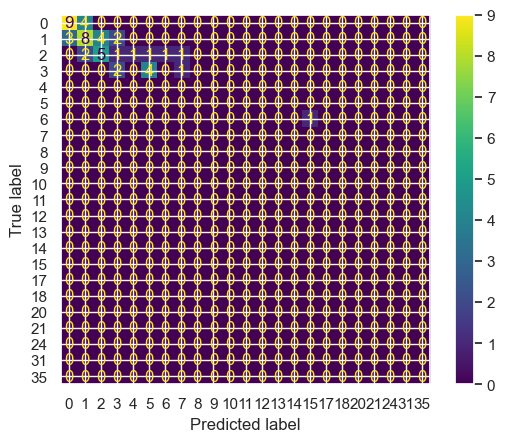

In [36]:
x11 = df11.iloc[:,:2]
y11 = df11.iloc[:,2:]

y11=y11.astype('int')
x11_train, x11_test, y11_train, y11_test = train_test_split(x11, y11, train_size = 0.9, random_state=1)

# print("x5_train shape", x5_train.shape)
# print("x5_train shape", y5_train.shape)
# print("x5_test shape", x5_test.shape)
# print("y5_test shape", y5_test.shape)

x11_train = np.array(x11_train)
x11_test = np.array(x11_test)

#Standardize the data
scaler = StandardScaler() 

x11 = x11.values
y11 = y11.values

scaler.fit(x11)
x11_train = scaler.transform(x11_train)
x11_test = scaler.transform(x11_test)


dt_model_us = RandomForestClassifier()
rf_clf_us = dt_model_us.fit(x11_train,y11_train.values.ravel())

# Predict targets on the testing data
test_random_forest_us = rf_clf_us.predict(x11_test)

Accuracy_RF_us = accuracy_score(y11_test, test_random_forest_us)
Recall_RF_us = recall_score(y11_test, test_random_forest_us, average='micro')
Precission_RF_us = precision_score(y11_test, test_random_forest_us,average='micro')
F1_score_RF_us = matthews_corrcoef(y11_test, test_random_forest_us)

print("1. Results using Random Forest Unsupported Span")
print("==========================================================================")
print('Accuracy for Unsupported Span [Random Forest]: %.3f' % (Accuracy_RF_us*100))
print('Precision for Unsupported Span [Random Forest]: %.3f' % (Precission_RF_us*100))
print('Recall for Unsupported Span [Random Forest]: %.3f' % (Recall_RF_us*100))
print('F1 Score for Unsupported Span [Random Forest]: %.3f' % (F1_score_RF_us*100))
print("==========================================================================")


mlp_us = MLPClassifier(hidden_layer_sizes=(60,60,60),max_iter=20000)

mlp_us.fit(x11_train,y11_train.values.ravel())


MLP_test_us= mlp_us.predict(x11_test)
Accuracy_MLP_us = metrics.accuracy_score(MLP_test_us, y11_test)
Precission_MLP_us = metrics.precision_score(MLP_test_us, y11_test,average='micro')
Recall_MLP_us = metrics.recall_score(MLP_test_us, y11_test,average='micro')
F1_score_MLP_us = metrics.recall_score(MLP_test_us, y11_test,average='micro')



print("2. Results using Multilayer Perceptron for Unsupported Span ")
print("==========================================================================")
print('Accuracy for Unsupported Span [MLPClassifier]: %.3f' % (Accuracy_MLP_us*100))
print('Precision for Unsupported Span [MLPClassifier]: %.3f' % (Precission_MLP_us*100))
print('Recall for Unsupported Span [MLPClassifier]: %.3f' % (Recall_MLP_us*100))
print('F1 Score for Unsupported Span [MLPClassifier]: %.3f' % (F1_score_MLP_us*100))
print("==========================================================================")


# all parameters not specified are set to their defaults
model_LR_us = LogisticRegression()
model_LR_us.fit(x11_train, y11_train.values.ravel())


#Predict Output
predicted_us= model_LR_us.predict(x11_test) 



print("3. Linear Regression results for Unsupported Span ")
print("==========================================================================")
#Model Accuracy, how often is the classifier correct?
Accuracy_LR_us = metrics.accuracy_score(predicted_us, y11_test)
Precission_LR_us = metrics.precision_score(predicted_us, y11_test,average='micro')
Recall_LR_us = metrics.recall_score(predicted_us, y11_test,average='micro')
F1_score_LR_us = metrics.f1_score(predicted_us, y11_test,average='micro')


print('Accuracy for Unsupported Span [Logistic Regression]: %.3f' % (Accuracy_LR_us*100))
print('Precission for Unsupported Span [Logistic Regression]: %.3f' % (Precission_LR_us*100))
print('Recall for Unsupported Span [Logistic Regression]: %.3f' % (Recall_LR_us*100))
print('F1 Score for Unsupported Span [Logistic Regression]: %.3f' % (F1_score_LR_us*100))
print("=========================================================================")

ababoost_us = AdaBoostClassifier(estimator=RandomForestClassifier(max_depth=15),
                           n_estimators=100, 
                           learning_rate=1.0, 
                           algorithm='SAMME.R')
ababoost_us = ababoost_us.fit(x11_train, y11_train.values.ravel())

# Predict targets on the testing data
test_predictions_us = ababoost_us.predict(x11_test)
Accuracy_AC_us = accuracy_score(y11_test, test_predictions_us)
Recall_AC_us = recall_score(y11_test, test_predictions_us,average='micro')
Precission_AC_us = precision_score(y11_test, test_predictions_us,average='micro')
F1_score_AC_us = matthews_corrcoef(y11_test, test_predictions_us)


print("4. AdaBoost Claasifier for Unsupported Span")
print("=========================================================================")
print('Accuracy for Unsupported Span [AdaBoost Claasifier]: %.3f' % (Accuracy_AC_us*100))
print('Precission for Unsupported Span [AdaBoost Claasifier]: %.3f' % (Precission_AC_us*100))
print('Recall for Unsupported Span [AdaBoost Claasifier]: %.3f' % (Recall_AC_us*100))
print('F1 Score for Unsupported Span [AdaBoost Claasifier]: %.3f' % (F1_score_AC_us*100))
print("=========================================================================")


extra_tree_us = ExtraTreesClassifier()
extra_tree_us = extra_tree_us.fit(x11_train, y11_train.values.ravel())

# Predict targets on the testing data
extra_tree_test_predictions_us = extra_tree_us.predict(x11_test)

Accuracy_ETC_us = accuracy_score(y11_test, extra_tree_test_predictions_us)
Recall_ETC_us = recall_score(y11_test, extra_tree_test_predictions_us,average='micro')
Precission_ETC_us = precision_score(y11_test, extra_tree_test_predictions_us,average='micro')
F1_score_ETC_us = matthews_corrcoef(y11_test, extra_tree_test_predictions_us)

print("5. Extra Tree Classifier for Unsupported Span")
print("=========================================================================")
print('Accuracy for Unsupported Span [ExtraTreesClassifier]: %.3f' % (Accuracy_ETC_us*100))
print('Precission for Unsupported Span [ExtraTreesClassifier]: %.3f' % (Precission_ETC_us*100))
print('Recall for Unsupported Span [ExtraTreesClassifier]: %.3f' % (Recall_ETC_us*100))
print('F1 Score for Unsupported Span [ExtraTreesClassifier]: %.3f' % (F1_score_ETC_us*100))
print("=========================================================================")


gradient_boosting_us = GradientBoostingClassifier()
gradient_boosting_us = gradient_boosting_us.fit(x11_train, y11_train.values.ravel())

# Predict targets on the testing data
gradient_boosting_test_predictions_us = gradient_boosting_us.predict(x11_test) 

Accuracy_GBC_us = accuracy_score(y11_test, gradient_boosting_test_predictions_us)
Recall_GBC_us = recall_score(y11_test, gradient_boosting_test_predictions_us,average='micro')
Precission_GBC_us = precision_score(y11_test, gradient_boosting_test_predictions_us,average='micro')
F1_score_GBC_us = matthews_corrcoef(y11_test, gradient_boosting_test_predictions_us)


print("6. Gradient Boosting Classifier for Unsupported Span")
print("=========================================================================")
print('Accuracy for Unsupported Span [Gradient Boosting Classifier]: %.3f' % (Accuracy_GBC_us*100))
print('Precission for Unsupported Span [Gradient Boosting Classifier: %.3f' % (Precission_GBC_us*100))
print('Recall for Unsupported Span [Gradient Boosting Classifier]: %.3f' % (Recall_GBC_us*100))
print('F1 Score for Unsupported Span [Gradient Boosting Classifier]: %.3f' % (F1_score_GBC_us*100))
print("=========================================================================")

svm_us = SVC(kernel='linear')
svm_us = svm_us.fit(x11_train, y11_train.values.ravel())

#Predict targets on the testing data
svm_test_predictions_us = svm_us.predict(x11_test)

# Checking the performance
Accuracy_SVM_us = accuracy_score(y11_test, svm_test_predictions_us)
Precission_SVM_us = recall_score(y11_test, svm_test_predictions_us,average='micro')
Recall_SVM_us = precision_score(y11_test, svm_test_predictions_us,average='micro')
F1_score_SVM_us = matthews_corrcoef(y11_test, svm_test_predictions_us)


print("7. Support Vector Machine for Unsupported Span")
print("=========================================================================")
print('Accuracy for Unsupported Span [Support Vector Machine]: %.3f' % (Accuracy_SVM_us*100))
print('Precission for Unsupported Span [Support Vector Machine]: %.3f' % (Precission_SVM_us*100))
print('Recall for Unsupported Span [Support Vector Machine]: %.3f' % (Recall_SVM_us*100))
print('F1 Score for Unsupported Span [Support Vector Machine]: %.3f' % (F1_score_SVM_us*100))

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(svm_test_predictions_us, y11_test, labels=svm_us.classes_) 
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=svm_us.classes_)
disp.plot()

plt.show()
print("=========================================================================")



# 5. Plotting the performance chat 

In [37]:
# Collecting heights of plots for the different performances

data1 =[
    
    ["Jn", Accuracy_MLP_Jn*100, 
                     Accuracy_LR_Jn*100, 
                     Accuracy_RF_Jn*100, 
                     Accuracy_AC_Jn*100, 
                     Accuracy_ETC_Jn*100, 
                     Accuracy_GBC_Jn*100, 
                     Accuracy_SVM_Jn*100
    ],
    
    ["Jr",Accuracy_MLP_Jr*100,
                Accuracy_RF_Jr*100,
                Accuracy_LR_Jr*100,
                Accuracy_AC_Jr*100, 
                Accuracy_ETC_Jr*100,
                Accuracy_GBC_Jr*100,
                Accuracy_SVM_Jr*100
    ],
    ["Ja", Accuracy_MLP_Ja*100,
                Accuracy_RF_Ja*100,
                Accuracy_LR_Ja*100,
                Accuracy_AC_Ja*100, 
                Accuracy_ETC_Ja*100,
                Accuracy_GBC_Ja*100,
                Accuracy_SVM_Ja*100  
    ],
    ["Jw",Accuracy_MLP_Jw*100,
                Accuracy_RF_Jw*100,
                Accuracy_LR_Jw*100,
                Accuracy_AC_Jw*100, 
                Accuracy_ETC_Jw*100,
                Accuracy_GBC_Jw*100,
                Accuracy_SVM_Jw*100  
    ],
    ["RQD",Accuracy_MLP_rqd*100,
                Accuracy_RF_rqd*100,
                Accuracy_LR_rqd*100,
                Accuracy_AC_rqd*100, 
                Accuracy_ETC_rqd*100,
                Accuracy_GBC_rqd*100,
                Accuracy_SVM_rqd*100
    ],
    ["SRF",Accuracy_MPL_srf*100,
                Accuracy_RF_srf*100,
                Accuracy_LR_srf*100,
                Accuracy_AC_srf*100, 
                Accuracy_ETC_srf*100,
                Accuracy_GBC_srf*100,
                Accuracy_SVM_srf*100
    ],
    ["UCS_VSR",Accuracy_MLP_ucsvsr*100,
                Accuracy_RF_ucsvsr*100,
                Accuracy_LR_ucsvsr*100,
                Accuracy_AC_ucsvsr*100, 
                Accuracy_ETC_ucsvsr*100,
                Accuracy_GBC_ucsvsr*100,
                Accuracy_SVM_ucsvsr*100   
    ],
    ["Q",  Accuracy_MLP_q*100,
                Accuracy_RF_q*100,
                Accuracy_LR_q*100,
                Accuracy_AC_q*100, 
                Accuracy_ETC_q*100,
                Accuracy_GBC_q*100,
                Accuracy_SVM_q*100   
    ],
    
    ["ESR",
               Accuracy_MPL_esr*100,
                Accuracy_RF_esr*100,
                Accuracy_LR_esr*100,
                Accuracy_AC_esr*100, 
                Accuracy_ETC_esr*100,
                Accuracy_GBC_esr*100,
                Accuracy_SVM_esr*100
],

["RMR",
                Accuracy_MLP_rmr*100,
                Accuracy_RF_rmr*100,
                Accuracy_LR_rmr*100,
                Accuracy_AC_rmr*100, 
                Accuracy_ETC_rmr*100,
                Accuracy_GBC_rmr*100,
                Accuracy_SVM_rmr*100
],

["UnsupportedSpan",
                Accuracy_MLP_us*100,
                Accuracy_RF_us*100,
                Accuracy_LR_us*100,
                Accuracy_AC_us*100, 
                Accuracy_ETC_us*100,
                Accuracy_GBC_us*100,
                Accuracy_SVM_us*100
]
    ]


# Precissions

data2 = [
    
    ["Jn",
                Precission_MLP_Jn*100, 
                Precission_LR_Jn*100, 
                Precission_RF_Jn*100, 
                Precission_AC_Jn*100, 
                Precission_ETC_Jn*100, 
                Precission_GBC_Jn*100, 
                Precission_SVM_Jn*100
    ],
["Jr",
               Precission_MLP_Jr*100,
               Precission_LR_Jr*100,
               Precission_RF_Jr*100,
               Precission_AC_Jr*100, 
               Precission_ETC_Jr*100,
               Precission_GBC_Jr*100,
               Precission_SVM_Jr*100
],
["Ja",
               Precission_MLP_Ja*100,
               Precission_LR_Ja*100,
               Precission_RF_Ja*100,
               Precission_AC_Ja*100, 
               Precission_ETC_Ja*100,
               Precission_GBC_Ja*100,
               Precission_SVM_Ja*100
],

["Jw",
               Precission_MLP_Jw*100,
               Precission_LR_Jw*100,
               Precission_RF_Jw*100,
               Precission_AC_Jw*100, 
               Precission_ETC_Jw*100,
               Precission_GBC_Jw*100,
               Precission_SVM_Jw*100
],

["RQD",
               Precission_MLP_rqd*100,
               Precission_LR_rqd*100,
               Precission_RF_rqd*100,
               Precission_AC_rqd*100, 
               Precission_ETC_rqd*100,
               Precission_GBC_rqd*100,
               Precission_SVM_rqd*100
],

["SRF",
               Precission_MPL_srf*100,
               Precission_LR_srf*100,
               Precission_RF_srf*100,
               Precission_AC_srf*100, 
               Precission_ETC_srf*100,
               Precission_GBC_srf*100,
               Precission_SVM_srf*100
],

["UCS_VSR",
               Precission_MLP_ucsvsr*100,
               Precission_LR_ucsvsr*100,
               Precission_RF_ucsvsr*100,
               Precission_AC_ucsvsr*100, 
               Precission_ETC_ucsvsr*100,
               Precission_GBC_ucsvsr*100,
               Precission_SVM_ucsvsr*100
],

["Q",
               Precission_MLP_q*100,
               Precission_LR_q*100,
               Precission_RF_q*100,
               Precission_AC_q*100, 
               Precission_ETC_q*100,
               Precission_GBC_q*100,
               Precission_SVM_q*100
],

["ESR",
               Precission_MPL_esr*100,
               Precission_LR_esr*100,
               Precission_RF_esr*100,
               Precission_AC_esr*100, 
               Precission_ETC_esr*100,
               Precission_GBC_esr*100,
              Precission_SVM_esr*100
],

["RMR",
               Precission_MLP_rmr*100,
               Precission_LR_rmr*100,
               Precission_RF_rmr*100,
               Precission_AC_rmr*100, 
               Precission_ETC_rmr*100,
               Precission_GBC_rmr*100,
               Precission_SVM_rmr*100
],

["Unsupported_Span",
               Precission_MLP_us*100,
               Precission_LR_us*100,
               Precission_RF_us*100,
               Precission_AC_us*100, 
               Precission_ETC_us*100,
               Precission_GBC_us*100,
               Precission_SVM_us*100
]   
]

# Recall

data3 = [
    
["Jn",
                Recall_MLP_Jn*100, 
                Recall_LR_Jn*100, 
                Recall_RF_Jn*100, 
                Recall_AC_Jn*100, 
                Recall_ETC_Jn*100, 
                Recall_GBC_Jn*100, 
                Recall_SVM_Jn*100
],
["Jr",
               Recall_MLP_Jr*100,
               Recall_RF_Jr*100,
               Recall_LR_Jr*100,
               Recall_AC_Jr*100, 
               Recall_ETC_Jr*100,
               Recall_GBC_Jr*100,
               Recall_SVM_Jr*100
],
["Ja",
               Recall_MLP_Ja*100,
               Recall_RF_Ja*100,
               Recall_LR_Ja*100,
               Recall_AC_Ja*100, 
               Recall_ETC_Ja*100,
               Recall_GBC_Ja*100,
               Recall_SVM_Ja*100
],

["Jw",
               Recall_MLP_Jw*100,
               Recall_RF_Jw*100,
               Recall_LR_Jw*100,
               Recall_AC_Jw*100, 
               Recall_ETC_Jw*100,
               Recall_GBC_Jw*100,
               Recall_SVM_Jw*100
],

["RQD",
               Recall_MLP_rqd*100,
               Recall_RF_rqd*100,
               Recall_LR_rqd*100,
               Recall_AC_rqd*100, 
               Recall_ETC_rqd*100,
               Recall_GBC_rqd*100,
               Recall_SVM_rqd*100
],

["SRF",
               Recall_MPL_srf*100,
               Recall_RF_srf*100,
               Recall_LR_srf*100,
               Recall_AC_srf*100, 
               Recall_ETC_srf*100,
               Recall_GBC_srf*100,
               Recall_SVM_srf*100
],

["UCS_VSR",
               Recall_MLP_ucsvsr*100,
               Recall_RF_ucsvsr*100,
               Recall_LR_ucsvsr*100,
               Recall_AC_ucsvsr*100, 
               Recall_ETC_ucsvsr*100,
               Recall_GBC_ucsvsr*100,
               Recall_SVM_ucsvsr*100
],

["Q",
               Recall_MLP_q*100,
               Recall_RF_q*100,
               Recall_LR_q*100,
               Recall_AC_q*100, 
               Recall_ETC_q*100,
               Recall_GBC_q*100,
               Recall_SVM_q*100
],

["ESR",
              Recall_MPL_esr*100,
               Recall_RF_esr*100,
               Recall_LR_esr*100,
               Recall_AC_esr*100, 
               Recall_ETC_esr*100,
               Recall_GBC_esr*100,
               Recall_SVM_esr*100
],

["RMR",
               Recall_MLP_rmr*100,
               Recall_RF_rmr*100,
               Recall_LR_rmr*100,
               Recall_AC_rmr*100, 
               Recall_ETC_rmr*100,
               Recall_GBC_rmr*100,
               Recall_SVM_rmr*100
],

["Unsupported_Span",
               Recall_MLP_us*100,
               Recall_RF_us*100,
               Recall_LR_us*100,
               Recall_AC_us*100, 
               Recall_ETC_us*100,
               Recall_GBC_us*100,
               Recall_SVM_us*100
]    
]


# F1 scores

data4  = [
    ["Jn",
                F1_score_MLP_Jn*100, 
                F1_score_LR_Jn*100, 
                F1_score_RF_Jn*100, 
                F1_score_AC_Jn*100, 
                F1_score_ETC_Jn*100, 
                F1_score_GBC_Jn*100, 
                F1_score_SVM_Jn*100
    ],
    
    ["Jr",
               F1_score_MLP_Jr*100,
               F1_score_RF_Jr*100,
               F1_score_LR_Jr*100,
               F1_score_AC_Jr*100, 
               F1_score_ETC_Jr*100,
               F1_score_GBC_Jr*100,
               F1_score_SVM_Jr*100
],
["Ja",
               F1_score_MLP_Ja*100,
               F1_score_RF_Ja*100,
               F1_score_LR_Ja*100,
               F1_score_AC_Ja*100, 
               F1_score_ETC_Ja*100,
               F1_score_GBC_Ja*100,
               F1_score_SVM_Ja*100
],

["Jw",
               F1_score_MLP_Jw*100,
               F1_score_RF_Jw*100,
               F1_score_LR_Jw*100,
               F1_score_AC_Jw*100, 
               F1_score_ETC_Jw*100,
               F1_score_GBC_Jw*100,
               F1_score_SVM_Jw*100
],

["RQD",
               F1_score_MLP_rqd*100,
               F1_score_RF_rqd*100,
               F1_score_LR_rqd*100,
               F1_score_AC_rqd*100, 
               F1_score_ETC_rqd*100,
               F1_score_GBC_rqd*100,
               F1_score_SVM_rqd*100
],

["SRF",
               F1_score_MPL_srf*100,
               F1_score_RF_srf*100,
               F1_score_LR_srf*100,
               F1_score_AC_srf*100, 
               F1_score_ETC_srf*100,
               F1_score_GBC_srf*100,
               F1_score_SVM_srf*100
],

["UCS_VSR",
               F1_score_MLP_ucsvsr*100,
               F1_score_RF_ucsvsr*100,
               F1_score_LR_ucsvsr*100,
               F1_score_AC_ucsvsr*100, 
               F1_score_ETC_ucsvsr*100,
               F1_score_GBC_ucsvsr*100,
               F1_score_SVM_ucsvsr*100
],

["Q",
               F1_score_MLP_q*100,
               F1_score_RF_q*100,
               F1_score_LR_q*100,
               F1_score_AC_q*100, 
               F1_score_ETC_q*100,
               F1_score_GBC_q*100,
               F1_score_SVM_q*100
],

["ESR",
              F1_score_MPL_esr*100,
               F1_score_RF_esr*100,
               F1_score_LR_esr*100,
               F1_score_AC_esr*100, 
               F1_score_ETC_esr*100,
               F1_score_GBC_esr*100,
               F1_score_SVM_esr*100
],

["RMR",
               F1_score_MLP_rmr*100,
               F1_score_RF_rmr*100,
               F1_score_LR_rmr*100,
               F1_score_AC_rmr*100, 
               F1_score_ETC_rmr*100,
               F1_score_GBC_rmr*100,
               F1_score_SVM_rmr*100
],

["Unsupported_Span",
               F1_score_MLP_us*100,
               F1_score_RF_us*100,
               F1_score_LR_us*100,
               F1_score_AC_us*100, 
               F1_score_ETC_us*100,
               F1_score_GBC_us*100,
               F1_score_SVM_us*100
]   
]




In [38]:
# Allocating Colors for the different sub models

my_color = ['yellow', 'cyan', 'm', 'blue', 'red', 'green', 'orange']
algorithms = ["Model","MLPClassifier", "Random Forest", "Logistic Regression", "AdaBoost Classifier", "ExtraTreesClassifier", "Gradient Boosting Classifier", "Support Vector Machine"]


In [39]:
#Plot multiple bar chart for the algorithms of different models

df1=pd.DataFrame(data1,columns=algorithms)
df2=pd.DataFrame(data2,columns=algorithms)
df3=pd.DataFrame(data3,columns=algorithms)
df4=pd.DataFrame(data4,columns=algorithms)

                                                  ACCURACY


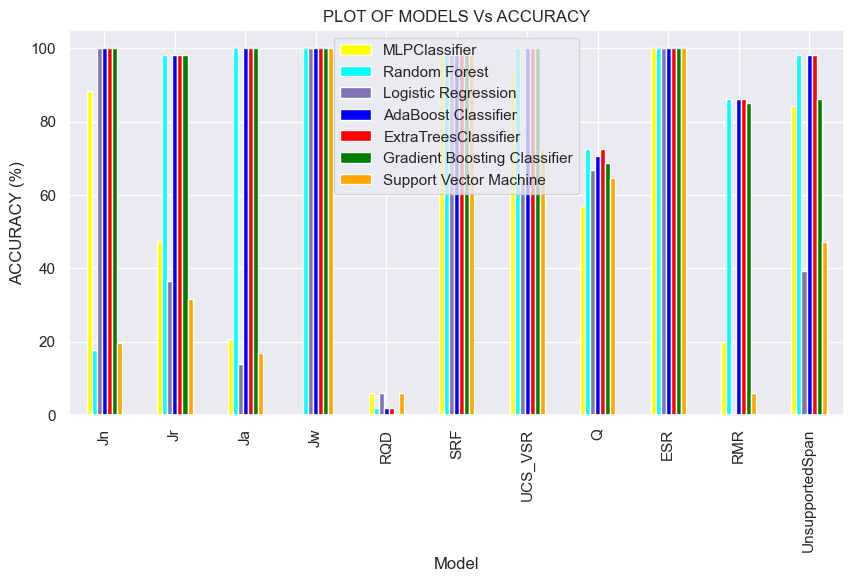

                                                  PRECISION


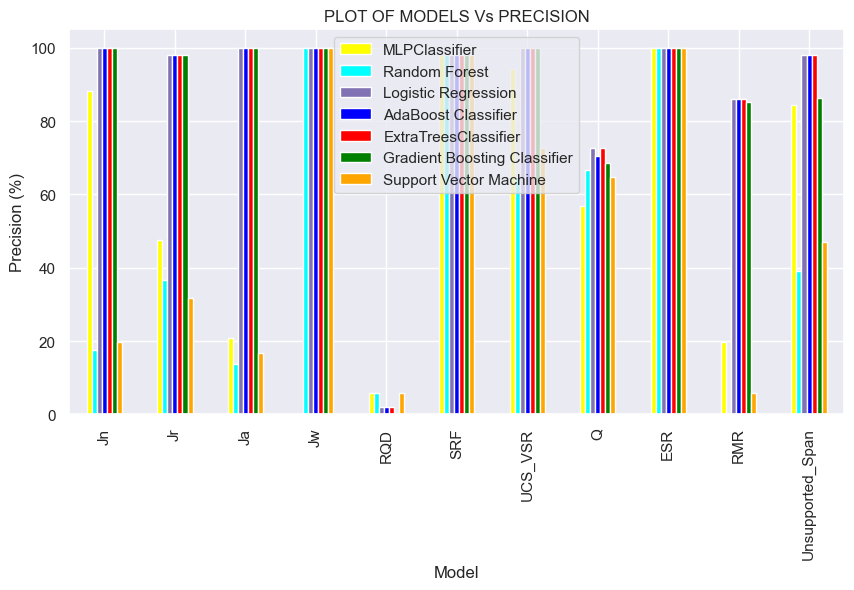

                                                  RECALL


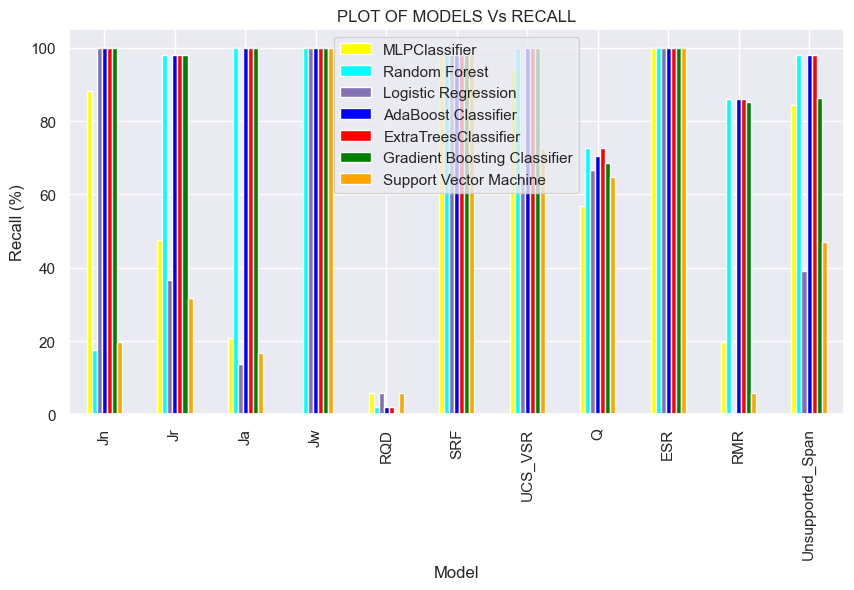

                                                  F1 SCORE


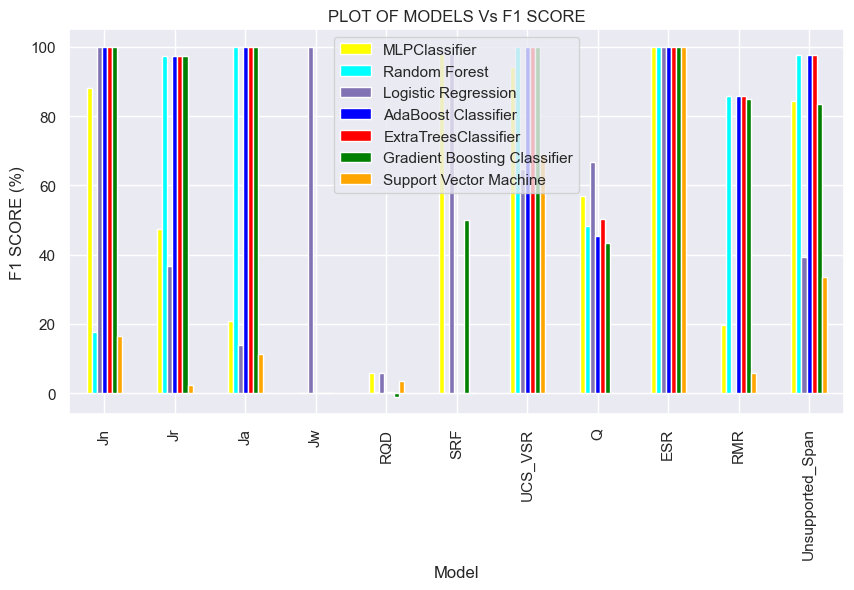

In [53]:
#Printing the different charts for the algorithms of the different sub models
print("=========================================================================================================")
print("                                                  ACCURACY")
print("=========================================================================================================")

df1.plot(x="Model", y=["MLPClassifier", "Random Forest", "Logistic Regression", "AdaBoost Classifier", "ExtraTreesClassifier", "Gradient Boosting Classifier", "Support Vector Machine"], kind="bar",
        figsize=(10,5), color=my_color)

# Add title

plt.title("PLOT OF MODELS Vs ACCURACY")
plt.ylabel("ACCURACY (%)")

# Show

plt.show()
print("=========================================================================================================")
print("                                                  PRECISION")
print("=========================================================================================================")

df2.plot(x="Model", y=["MLPClassifier", "Random Forest", "Logistic Regression", "AdaBoost Classifier", "ExtraTreesClassifier", "Gradient Boosting Classifier", "Support Vector Machine"], kind="bar",
        figsize=(10,5), color=my_color)

# Add title

plt.title("PLOT OF MODELS Vs PRECISION")
plt.ylabel('Precision (%)')

# Show

plt.show()

print("=========================================================================================================")
print("                                                  RECALL")
print("=========================================================================================================")


df3.plot(x="Model", y=["MLPClassifier", "Random Forest", "Logistic Regression", "AdaBoost Classifier", "ExtraTreesClassifier", "Gradient Boosting Classifier", "Support Vector Machine"], kind="bar",
        figsize=(10,5), color=my_color)


# Add title

plt.title("PLOT OF MODELS Vs RECALL")
plt.ylabel('Recall (%)')

# Show

plt.show()

print("=========================================================================================================")
print("                                                  F1 SCORE")
print("=========================================================================================================")


df4.plot(x="Model", y=["MLPClassifier", "Random Forest", "Logistic Regression", "AdaBoost Classifier", "ExtraTreesClassifier", "Gradient Boosting Classifier", "Support Vector Machine"], kind="bar",
        figsize=(10,5), color=my_color)


# Add title

plt.title("PLOT OF MODELS Vs F1 SCORE")
plt.ylabel('F1 SCORE (%)')

# Show

plt.show()
print("=========================================================================================================")
print("=========================================================================================================")



# 6. Testing the models with the highest performances

# 7. Saving the models with the highest performances